In [ ]:
pip install dython

In [ ]:
pip install scikit-plot

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

import numpy as np 
import regex as re

import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# # # Import LazyPredict libraries
# import lazypredict
# from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif


from sklearn.model_selection import train_test_split, cross_val_score


from sklearn import metrics

from sklearn.metrics import accuracy_score

from numpy import mean
from numpy import std
from scipy.stats import sem

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import silhouette_score


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from numpy import unique
from numpy import where
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import multilabel_confusion_matrix

# from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score, silhouette_samples

# from yellowbrick.cluster import SilhouetteVisualizer
# from yellowbrick.cluster import silhouette_visualizer

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px

from sklearn.metrics import silhouette_score



from itertools import product
from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d



# import pandas as pd
import scikitplot as skplt
# from sklearn import datasets
from dython.nominal import associations


In [ ]:
df = pd.read_csv('/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_institutional_data_allyrs.csv')

In [ ]:
df.head()

YEAR  UNITID STABBR                               INSTNM  OBEREG  HDEGOFFR  \
0  2015  100654     AL             Alabama A & M University       5        12   
1  2015  100663     AL  University of Alabama at Birmingham       5        11   
2  2015  100690     AL                   Amridge University       5        12   
3  2015  100706     AL  University of Alabama in Huntsville       5        11   
4  2015  100724     AL             Alabama State University       5        11   

   GROFFER  HBCU  LOCALE  INSTCAT  ...  ADMCON3  ADMCON4  ADMCON5  ADMCON6  \
0        1     1      12        2  ...        1        2        3        2   
1        1     2      12        2  ...        1        1        3        3   
2        1     2      12        2  ...        0        0        0        0   
3        1     2      12        2  ...        1        1        3        2   
4        1     1      12        2  ...        2        3        3        3   

   ADMCON7  ADMCON8  ADMCON9  SATNUM  ACTNUM  EFYTOTLT  
0        1        1        3     136    1375      4549  
1        1        3        3     106    1497     13465  
2        0        0        0       0       0       401  
3        1        1        3     183     975      6540  
4        1        1        3     212     894      5456  

[5 rows x 53 columns]

In [ ]:
df_2020_1 = df.loc[lambda df:((df['YEAR']==2020)),:]

df_2020= df_2020_1.copy(deep=False)
df_2020.shape



(3488, 53)

### Looking at the histograms I realize that one of the variables still needs to be corrected as it contains a "Not Applicable" code: TUITVARY

### We are going to assign  a "NO" to the institutions for which TUITVARY is not applicable since these are institutions that are operating and mainly appear to be college level. 

### Some are  mixed undergraduate and Graduate level institutions but a minority (only 3) 

In [ ]:
colc=['TUITVARY']

for i in colc:
  df_2020[i] = df_2020[i].astype(str)
  df_2020[i] = df_2020[i].map(lambda x: re.sub(r'-2', '2', x))
  df_2020[i] = df_2020[i].astype(int)

In [ ]:

df_2020 = df_2020.loc[df_2020['INSTSIZE']!=-1]

# Let us recap the variables selected and their codes:

## 'EFYTOTLT' = Our target variable is total enrollment 

## 'YEAR' = Our data refers to the years between 2012 and 2020

## 'UNITID' = ID code for each Heigher Education Institution

## 'STABBR' = State Abbreviation 

## 'INSTNM' = Institution's name

## 'OBEREG'= Code indicating the Bureau of Economic Analysis Regions the US is divided into (MD is in region 2) 
### 0 - US Service schools
### 1 - New England CT ME MA NH RI VT
### 2 - Mid East DE DC MD NJ NY PA
### 3 - Great Lakes IL IN MI OH WI
### 4 - Plains IA KS MN MO NE ND SD
### 5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV
### 6 - Southwest AZ NM OK TX
### 7 - Rocky Mountains CO ID MT UT WY
### 8 - Far West AK CA HI NV OR WA
### 9 - Outlying areas AS FM GU MH MP PR PW VI  - (Not in the Continental USA) 

## 'HDEGOFFR'= Code indicating the level of Degree offered by the Academic-Oriented HEI
### 11	Doctor's degree - research/scholarship and professional practice
### 12	Doctor's degree - research/scholarship
### 13	Doctor's degree -  professional practice
### 14	Doctor's degree - other
### 20	Master's degree
### 30	Bachelor's degree
### 40	Associate's degree


## 'GROFFER' = Code indicating whether the HEI offers Graduate Level degrees
### 1	Graduate degree or certificate offering
### 2	No graduate offering

## 'HBCU' = Code indicating whether the HEI is an Historical Black College or University 
### 1 - Yes
### 2 - No 

## 'LOCALE' = Code indicating the territorial location of the HEI
### 11	City: Large
### 12	City: Midsize
### 13	City: Small
### 21	Suburb: Large
### 22	Suburb: Midsize
### 23	Suburb: Small
### 31	Town: Fringe
### 32	Town: Distant
### 33	Town: Remote
### 41	Rural: Fringe
### 42	Rural: Distant
### 43	Rural: Remote
### -3	{Not available}

## 'INSTCAT' = Code indicating the type of institution
### 1 - indicates institutions offering undergraduate programs
### 2 - indicates institutions offering both graduate and undergraduate programs

## 'INSTSIZE'= Code indicating the range of students enrollable by year
### 1	Under 1,000
### 2	1,000 - 4,999
### 3	5,000 - 9,999
### 4	10,000 - 19,999
### 5	20,000 and above

## 'CNTLAFFI'= Code indicating the type of control the HEI is subject to 
###	1	Public
###	2	Private for-profit
###	3	Private not-for-profit (no religious affiliation)
###	4	Private not-for-profit (religious affiliation)

## 'OPENADMP' = Code indicating whether the HEI adopts an Open Enrollment Policy or not
### 1 = Yes
### 2 = No

## 'CREDITS1'= Dual enrollment
## 'CREDITS2'= Credit for life experiences
## 'CREDITS3'= Advanced placement (AP) credits
## 'CREDITS4'= Institution does not accept dual, credit for life, or AP credits
### Code  0 = No 
### Code 1 = Yes 

## 'SLO5' = ROTC
## 'SLO6' = Study abroad
## 'SLO7' = Weekend/evening  college
## 'SLO83' = Teacher certification: Approved by the state for initial certifcation or licensure of teachers
### Code  0 = No 
### Code 1 = Yes 

## 'STUSRV1	Remedial services
## STUSRV2	Academic/career counseling service
## STUSRV3	Employment services for students
## STUSRV4	Placement services for completers
## STUSRV8	On-campus day care for students' children
### Code  0 = No 
### Code 1 = Yes 


## 'LIBRES1' = Variable indicating whether the HEI has a library 
### Code  0 = No 
### Code 1 = Yes

## 'ATHASSOC' = Member of National Athletic Association
### 1 - Yes
### 2 - No 

## 'APPLFEEU' = Application Fee

## 'TUITVARY' = Tuition charge varies for in-district, in-state, out-of-state students
### 1 - Yes
### 2 - No 


## 'ROOM' = HEI provides housing
### 1 - Yes
### 2 - No 

## 'BOARD', = HEI provides meal plan 
### 1 - Yes
### 2 - No 

## 'TUITPL' = Any alternative tuition plans offered by institution
### 1 - Yes
### 2 - No 

## VET1	Yellow Ribbon Program (officially known as Post-9/11 GI Bill, Yellow Ribbon Program)
## VET2	Credit for military training
## VET3	Dedicated point of contact for support services for veterans, military servicemembers, and their families
## VET4	Recognized student veteran organization
## VET5	Member of Servicemembers Opportunity Colleges
### Code  0 = No 
### Code 1 = Yes
NOTE: Data for these variables are missing for years 2012 and 2013 

## 'DSTNUGC' = Undergraduate Level distance Education Courses Offered
## DSTNUGP	Undergraduate level distance education programs offered
### Code  0 = No 
### Code 1 = Yes

## 'RMANDBRDAMT' = Room and Board costs

## ADMCON1	Secondary school GPA
## ADMCON2	Secondary school rank
## ADMCON3	Secondary school record
## ADMCON4	Completion of college-preparatory program
## ADMCON5	Recommendations
## ADMCON6	Formal demonstration of competencies
## ADMCON7	Admission test scores
## ADMCON8	TOEFL (Test of English as a Foreign Language
## ADMCON9	Other Test (Wonderlic, WISC-III, etc.)
### 0 Not Applicable
### 1	Required
###	2	Recommended
###	3	Neither required nor recommended
###	4	Do not know
###	5	Considered but not required

## SATNUM	Number of first-time degree/certificate-seeking students submitting SAT scores
## ACTNUM	Number of first-time degree/certificate-seeking students submitting ACT scores


### We are looking at the data for 2020 only and we are dropping the Institutions Name column as well as the year column 

In [ ]:

df_2020.drop(['YEAR','UNITID','STABBR', 'INSTNM'], axis = 1, inplace=True)

In [ ]:
df_2020.columns

Index(['OBEREG', 'HDEGOFFR', 'GROFFER', 'HBCU', 'LOCALE', 'INSTCAT',
       'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1', 'CREDITS2', 'CREDITS3',
       'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83', 'STUSRV1', 'STUSRV2',
       'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1', 'ATHASSOC', 'APPLFEEU',
       'TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4',
       'VET5', 'DSTNUGC', 'DSTNUGP', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2',
       'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8',
       'ADMCON9', 'SATNUM', 'ACTNUM', 'EFYTOTLT'],
      dtype='object')

### The data pertaining to the Continental US, excluding Service Schools and Outlying Territories, is more balanced - 

In [ ]:
df_2020['OBEREG'].value_counts()
# 0 - US Service schools

# 1 - New England CT ME MA NH RI VT
# 2 - Mid East DE DC MD NJ NY PA

# 3 - Great Lakes IL IN MI OH WI
# 4 - Plains IA KS MN MO NE ND SD

# 5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV

# 6 - Southwest AZ NM OK TX
# 7 - Rocky Mountains CO ID MT UT WY
# 8 - Far West AK CA HI NV OR WA

# 9 - Outlying areas AS FM GU MH MP PR PW VI  - (Not in the Continental USA) 


5    885
2    560
8    491
3    475
4    340
6    323
1    206
7    115
9     88
0      4
Name: OBEREG, dtype: int64

### Let us drop the data regarding the Non-continental USA and Service Schools since these are outlying groups 

In [ ]:
df_2020_2 = df.loc[lambda df:((df['YEAR']==2020)),:]
# # df.sort_values(by=['col1', 'col2'])
# df_2020_2.sort_values(by=['STABBR', 'col2'])
df_2020cl=df_2020_2.copy(deep=False)

In [ ]:
df_2020cl['OBEREG'].value_counts()

5    886
2    560
8    491
3    475
4    340
6    323
1    206
7    115
9     88
0      4
Name: OBEREG, dtype: int64

In [ ]:
df_2020cl = df_2020cl.loc[lambda df_2020cl:((df_2020cl['TUITVARY']!=-2)),:]

In [ ]:
df_2020cl = df_2020cl.loc[lambda df_2020cl:((df_2020cl['INSTSIZE']!=-1)),:]

In [ ]:
df_2020cl = df_2020cl.loc[lambda df_2020cl:((df_2020cl['OBEREG']!=0)),:]

In [ ]:
df_2020cl = df_2020cl.loc[lambda df_2020cl:((df_2020cl['OBEREG']!=9)),:]

In [ ]:
df_2020cl.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'HDEGOFFR', 'GROFFER',
       'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
       'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
       'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
       'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
       'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP',
       'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
       'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM',
       'EFYTOTLT'],
      dtype='object')

### For our clustering analysis let us reduce the number of columns eliminating right away a few columns like year (since we are looking at 2020 data only), UNITID since this code only identifies the institutions, Instnm because it provides the name of the institution, distnugcp because this data is well captured by another variable.

### We will see how LaziClassifier is able to classify the institutions according to State, in other words the State column is going to be our target variable.

In [ ]:
df_2020cl.drop(['YEAR', 'UNITID','INSTNM','GROFFER','DSTNUGP'], axis=1, inplace=True)

In [ ]:
df_2020cl.columns

Index(['STABBR', 'OBEREG', 'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE',
       'CNTLAFFI', 'OPENADMP', 'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4',
       'SLO5', 'SLO6', 'SLO7', 'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3',
       'STUSRV4', 'STUSRV8', 'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY',
       'ROOM', 'BOARD', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5',
       'DSTNUGC', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4',
       'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM',
       'ACTNUM', 'EFYTOTLT'],
      dtype='object')

In [ ]:
# df_2020cl.info() # APPLFEEU # INSTSIZE # RMANDBRDAMT # SATNUM # ACTNUM 

In [ ]:

df_2020cl.sort_values(by=['STABBR', 'INSTSIZE'], inplace=True)
# df_2020cl=df_2020_2.copy(deep=False)

In [ ]:

df_2020cl['OBEREG'] = df_2020cl['OBEREG'].astype(str)
df_2020cl['HDEGOFFR'] = df_2020cl['HDEGOFFR'].astype(str)
# df_2020cl['GROFFER'] = df_2020cl['GROFFER'].astype(str)
df_2020cl['HBCU'] = df_2020cl['HBCU'].astype(str)
df_2020cl['LOCALE'] = df_2020cl['LOCALE'].astype(str)
df_2020cl['INSTCAT'] = df_2020cl['INSTCAT'].astype(str)
df_2020cl['INSTSIZE'] = df_2020cl['INSTSIZE'].astype(str)
df_2020cl['CNTLAFFI'] = df_2020cl['CNTLAFFI'].astype(str)

df_2020cl['OPENADMP'] = df_2020cl['OPENADMP'].astype(str)
df_2020cl['CREDITS1'] = df_2020cl['CREDITS1'].astype(str)
df_2020cl['CREDITS2'] = df_2020cl['CREDITS2'].astype(str)
df_2020cl['CREDITS3'] = df_2020cl['CREDITS3'].astype(str)
df_2020cl['CREDITS4'] = df_2020cl['CREDITS4'].astype(str)
df_2020cl['SLO5'] = df_2020cl['SLO5'].astype(str)
df_2020cl['SLO6'] = df_2020cl['SLO6'].astype(str)
df_2020cl['SLO7'] = df_2020cl['SLO7'].astype(str)
df_2020cl['SLO83'] = df_2020cl['SLO83'].astype(str)
df_2020cl['STUSRV1'] = df_2020cl['STUSRV1'].astype(str)
df_2020cl['STUSRV2'] = df_2020cl['STUSRV2'].astype(str)
df_2020cl['STUSRV3'] = df_2020cl['STUSRV3'].astype(str)
df_2020cl['STUSRV4'] = df_2020cl['STUSRV4'].astype(str)
df_2020cl['STUSRV8'] = df_2020cl['STUSRV8'].astype(str)
df_2020cl['LIBRES1'] = df_2020cl['LIBRES1'].astype(str)
df_2020cl['ATHASSOC'] = df_2020cl['ATHASSOC'].astype(str)
df_2020cl['TUITVARY'] = df_2020cl['TUITVARY'].astype(str)
df_2020cl['ROOM'] = df_2020cl['ROOM'].astype(str)
df_2020cl['BOARD'] = df_2020cl['BOARD'].astype(str)
df_2020cl['TUITPL'] = df_2020cl['TUITPL'].astype(str)
df_2020cl['VET1'] = df_2020cl['VET1'].astype(str)
df_2020cl['VET2'] = df_2020cl['VET2'].astype(str)
df_2020cl['VET3'] = df_2020cl['VET3'].astype(str)
df_2020cl['VET4'] = df_2020cl['VET4'].astype(str)

df_2020cl['VET5'] = df_2020cl['VET5'].astype(str)
df_2020cl['DSTNUGC'] = df_2020cl['DSTNUGC'].astype(str)
# df_2020_ok['DSTNUGP'] = df_2020_ok['DSTNUGP'].astype(str)
df_2020cl['ADMCON1'] = df_2020cl['ADMCON1'].astype(str)

df_2020cl['ADMCON2'] = df_2020cl['ADMCON2'].astype(str)
df_2020cl['ADMCON3'] = df_2020cl['ADMCON3'].astype(str)
df_2020cl['ADMCON4'] = df_2020cl['ADMCON4'].astype(str)
df_2020cl['ADMCON5'] = df_2020cl['ADMCON5'].astype(str)
df_2020cl['ADMCON6'] = df_2020cl['ADMCON6'].astype(str)
df_2020cl['ADMCON7'] = df_2020cl['ADMCON7'].astype(str)
df_2020cl['ADMCON8'] = df_2020cl['ADMCON8'].astype(str)
df_2020cl['ADMCON9'] = df_2020cl['ADMCON9'].astype(str)


In [ ]:
# df_2020cl.info()


In [ ]:
# rmbrd = df_2020cl['RMANDBRDAMT'].values
# sats = df_2020cl['SATNUM'].values
# acts= df_2020cl['ACTNUM'].values
# fees = df_2020cl['APPLFEEU'].values
# df_2020cl['RMBRD_RATIOS']=round(df_2020cl['RMANDBRDAMT']/df_2020cl['EFYTOTLT'],2)
df_2020cl['SAT_RATIOS']=round(df_2020cl['SATNUM']/df_2020cl['EFYTOTLT'],2)
df_2020cl['ACT_RATIOS']=round(df_2020cl['ACTNUM']/df_2020cl['EFYTOTLT'],2)
# df_2020cl['FEES_RATIOS']=round(df_2020cl['APPLFEEU']/df_2020cl['EFYTOTLT'],2)
df_2020cl.tail()

STABBR OBEREG HDEGOFFR HBCU LOCALE INSTCAT INSTSIZE CNTLAFFI OPENADMP  \
33784     WY      7       30    2     23       1        2        1        1   
33785     WY      7       40    2     33       1        2        1        1   
33786     WY      7       40    2     33       1        2        1        1   
33787     WY      7       40    2     33       1        2        1        1   
33789     WY      7       11    2     33       2        4        1        2   

      CREDITS1  ... ADMCON5 ADMCON6 ADMCON7 ADMCON8 ADMCON9 SATNUM ACTNUM  \
33784        1  ...       0       0       0       0       0      0      0   
33785        1  ...       0       0       0       0       0      0      0   
33786        1  ...       0       0       0       0       0      0      0   
33787        1  ...       0       0       0       0       0      0      0   
33789        1  ...       3       3       1       1       3    463   1063   

      EFYTOTLT SAT_RATIOS ACT_RATIOS  
33784     5816       0.00        0.0  
33785     1955       0.00        0.0  
33786     6340       0.00        0.0  
33787     4180       0.00        0.0  
33789    10836       0.04        0.1  

[5 rows x 50 columns]

In [ ]:

sats = (df_2020cl['SAT_RATIOS'].values)*100
acts= (df_2020cl['ACT_RATIOS'].values)*100

ratios_sat = []
ratios_act = []

for i in range (len(sats)):
  if 0< sats[i] <10:
    ratios_sat.append(1)
  elif 10<= sats[i] <20:
    ratios_sat.append(2)
  elif 20<= sats[i] <30:
    ratios_sat.append(3)
  elif 30<= sats[i] <40:
    ratios_sat.append(4)
  elif 40<= sats[i]:
    ratios_sat.append(5)
  elif sats[i]==0:
    ratios_sat.append(0)    
# 
for i in range (len(acts)):
  if 0< acts[i] <10:
    ratios_act.append(1)
  elif 10<= acts[i] <20:
    ratios_act.append(2)
  elif 20<= acts[i] <30:
    ratios_act.append(3)
  elif 30<= acts[i] <40:
    ratios_act.append(4)
  elif 40<= acts[i]:
    ratios_act.append(5)
  elif acts[i]==0:
    ratios_act.append(0)
df_2020cl['SAT_ENROL'] = ratios_sat 
df_2020cl['ACT_ENROL'] = ratios_act 
df_2020cl.head()  

STABBR OBEREG HDEGOFFR HBCU LOCALE INSTCAT INSTSIZE CNTLAFFI OPENADMP  \
31123     AK      8       30    2     32       2        1        4        1   
31126     AK      8       13    2     11       2        1        4        2   
34030     AK      8       30    2     41       1        1        1        1   
34088     AK      8       40    2     41       1        1        4        1   
31125     AK      8       20    2     33       2        2        1        2   

      CREDITS1  ... ADMCON7 ADMCON8 ADMCON9 SATNUM ACTNUM EFYTOTLT SAT_RATIOS  \
31123        1  ...       0       0       0      0      0       49        0.0   
31126        1  ...       3       1       3      0      0      402        0.0   
34030        1  ...       0       0       0      0      0      574        0.0   
34088        1  ...       0       0       0      0      0      125        0.0   
31125        1  ...       2       1       3      0      0     3391        0.0   

      ACT_RATIOS SAT_ENROL ACT_ENROL  
31123        0.0         0         0  
31126        0.0         0         0  
34030        0.0         0         0  
34088        0.0         0         0  
31125        0.0         0         0  

[5 rows x 52 columns]

In [ ]:
# , stats

vals = df_2020cl['INSTSIZE'].values
sizes =[]

for  x in vals:
  if x=='3':
      # print(x)
    sizes.append(7499.5)
  elif x=='1':
    sizes.append(500.5)
  elif x=='2':
    sizes.append(2999.5)
  elif x=='4':
    sizes.append(14999.5)
  elif x=='5':
    sizes.append(28398)
  # print(sizes)
df_2020cl['CLASS_MIDDLE'] = sizes

# APPLFEEU # INSTSIZE # RMANDBRDAMT # SATNUM # ACTNUM 
enrols = df_2020cl['EFYTOTLT'].values
# rmbrd = df_2020cl['RMANDBRDAMT'].values
# sats = df_2020cl['SATNUM'].values
# acts= df_2020cl['ACTNUM'].values
# fees = df_2020cl['APPLFEEU'].values

# print(enrols.size)
compares = (df_2020cl['CLASS_MIDDLE'].values)
# print(compares.size)
# df_2020cl['CLASS_MIDDLE'] = compares

# df_2020cl.tail()  



compares2 = (df_2020cl['CLASS_MIDDLE'].values)*0.85

ratios = []

for i in range (len(enrols)):
  if enrols[i] > compares2[i]:
    ratios.append(1)
  else:
    ratios.append(0)
df_2020cl['HIGH_ENROL'] = ratios
df_2020cl.tail()  

# df.drop(['EFYTOTLT','SIZES'], axis=1, inplace=True)
# # df_2020cl.drop(['SIZES'], axis=1, inplace=True)

# INSTSIZE	1	Under 1,000 = 501 USED: 500.5
# INSTSIZE	2	1,000 - 4,999 = 3000 USED: 2999.5
# INSTSIZE	3	5,000 - 9,999 = 7500 USED: 7499.5
# INSTSIZE	4	10,000 - 19,999 = 15000 USED: 14999.5
# INSTSIZE	5	20,000 and above USED:

STABBR OBEREG HDEGOFFR HBCU LOCALE INSTCAT INSTSIZE CNTLAFFI OPENADMP  \
33784     WY      7       30    2     23       1        2        1        1   
33785     WY      7       40    2     33       1        2        1        1   
33786     WY      7       40    2     33       1        2        1        1   
33787     WY      7       40    2     33       1        2        1        1   
33789     WY      7       11    2     33       2        4        1        2   

      CREDITS1  ... ADMCON9 SATNUM ACTNUM EFYTOTLT SAT_RATIOS ACT_RATIOS  \
33784        1  ...       0      0      0     5816       0.00        0.0   
33785        1  ...       0      0      0     1955       0.00        0.0   
33786        1  ...       0      0      0     6340       0.00        0.0   
33787        1  ...       0      0      0     4180       0.00        0.0   
33789        1  ...       3    463   1063    10836       0.04        0.1   

      SAT_ENROL ACT_ENROL CLASS_MIDDLE HIGH_ENROL  
33784         0         0       2999.5          1  
33785         0         0       2999.5          0  
33786         0         0       2999.5          1  
33787         0         0       2999.5          1  
33789         1         2      14999.5          0  

[5 rows x 54 columns]

In [ ]:
# df_2020cl.info()

In [ ]:
# df_2020cl['ENROL_RATIOS']=round(df_2020cl['EFYTOTLT']/df_2020cl['CLASS_MIDDLE'],2)

In [ ]:
df_2020cl.head()

STABBR OBEREG HDEGOFFR HBCU LOCALE INSTCAT INSTSIZE CNTLAFFI OPENADMP  \
31123     AK      8       30    2     32       2        1        4        1   
31126     AK      8       13    2     11       2        1        4        2   
34030     AK      8       30    2     41       1        1        1        1   
34088     AK      8       40    2     41       1        1        4        1   
31125     AK      8       20    2     33       2        2        1        2   

      CREDITS1  ... ADMCON9 SATNUM ACTNUM EFYTOTLT SAT_RATIOS ACT_RATIOS  \
31123        1  ...       0      0      0       49        0.0        0.0   
31126        1  ...       3      0      0      402        0.0        0.0   
34030        1  ...       0      0      0      574        0.0        0.0   
34088        1  ...       0      0      0      125        0.0        0.0   
31125        1  ...       3      0      0     3391        0.0        0.0   

      SAT_ENROL ACT_ENROL CLASS_MIDDLE HIGH_ENROL  
31123         0         0        500.5          0  
31126         0         0        500.5          0  
34030         0         0        500.5          1  
34088         0         0        500.5          0  
31125         0         0       2999.5          1  

[5 rows x 54 columns]

In [ ]:
df_2020cl['ACT_RATIOS'].value_counts()

0.00    2121
0.02     107
0.03     105
0.04      84
0.07      78
0.08      76
0.01      73
0.06      70
0.09      61
0.05      61
0.12      56
0.11      44
0.10      42
0.14      34
0.13      33
0.15      33
0.16      28
0.17      26
0.20      16
0.21      12
0.18      12
0.22      11
0.19      10
0.23       4
0.24       3
0.27       3
0.38       1
0.41       1
0.35       1
0.25       1
0.33       1
Name: ACT_RATIOS, dtype: int64

In [ ]:
df_2020cl['SAT_RATIOS'].value_counts()

0.00    2162
0.01      71
0.12      71
0.11      71
0.02      66
0.10      62
0.09      62
0.13      59
0.07      58
0.08      58
0.14      57
0.06      52
0.15      52
0.03      50
0.04      49
0.05      46
0.16      40
0.18      29
0.17      27
0.20      18
0.19      15
0.22       7
0.23       7
0.21       4
0.32       3
0.27       2
0.26       2
0.25       2
0.37       1
0.31       1
0.35       1
0.28       1
0.24       1
0.33       1
Name: SAT_RATIOS, dtype: int64

In [ ]:
df_2020cl['SAT_RATIOS'].nunique() #3208

34

In [ ]:
df_2020cl['ACT_RATIOS'].nunique() #3208

31

In [ ]:
# df_2020cl['ACT_ENROL'].value_counts()

In [ ]:
df_2020cl.columns

Index(['STABBR', 'OBEREG', 'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE',
       'CNTLAFFI', 'OPENADMP', 'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4',
       'SLO5', 'SLO6', 'SLO7', 'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3',
       'STUSRV4', 'STUSRV8', 'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY',
       'ROOM', 'BOARD', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5',
       'DSTNUGC', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4',
       'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM',
       'ACTNUM', 'EFYTOTLT', 'SAT_RATIOS', 'ACT_RATIOS', 'SAT_ENROL',
       'ACT_ENROL', 'CLASS_MIDDLE', 'HIGH_ENROL'],
      dtype='object')

In [ ]:
df_2020cl.drop(['EFYTOTLT',	'SATNUM','ACTNUM', 'CLASS_MIDDLE',	'SAT_RATIOS','ACT_RATIOS',],axis=1,inplace=True)

In [ ]:
df_2020cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3208 entries, 31123 to 33789
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   STABBR       3208 non-null   object
 1   OBEREG       3208 non-null   object
 2   HDEGOFFR     3208 non-null   object
 3   HBCU         3208 non-null   object
 4   LOCALE       3208 non-null   object
 5   INSTCAT      3208 non-null   object
 6   INSTSIZE     3208 non-null   object
 7   CNTLAFFI     3208 non-null   object
 8   OPENADMP     3208 non-null   object
 9   CREDITS1     3208 non-null   object
 10  CREDITS2     3208 non-null   object
 11  CREDITS3     3208 non-null   object
 12  CREDITS4     3208 non-null   object
 13  SLO5         3208 non-null   object
 14  SLO6         3208 non-null   object
 15  SLO7         3208 non-null   object
 16  SLO83        3208 non-null   object
 17  STUSRV1      3208 non-null   object
 18  STUSRV2      3208 non-null   object
 19  STUSRV3      3208 non-

In [ ]:
df_2020cl['SAT_ENROL']=df_2020cl['SAT_ENROL'].astype(str)
df_2020cl['ACT_ENROL']=df_2020cl['ACT_ENROL'].astype(str)
df_2020cl['HIGH_ENROL']=df_2020cl['HIGH_ENROL'].astype(str)

In [ ]:
# # import pandas as pd
# # from sklearn import scikit-plot
# # from sklearn import datasets
# # from dython.nominal import associations

# # Load data 
# iris = datasets.load_iris()

# # Convert int classes to strings to allow associations 
# # method to automatically recognize categorical columns
# target = ['C{}'.format(i) for i in iris.target]

# # Prepare data
# X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# y = pd.DataFrame(data=target, columns=['target'])
# df = pd.concat([X, y], axis=1)

# # Plot features associations
# associations(df)

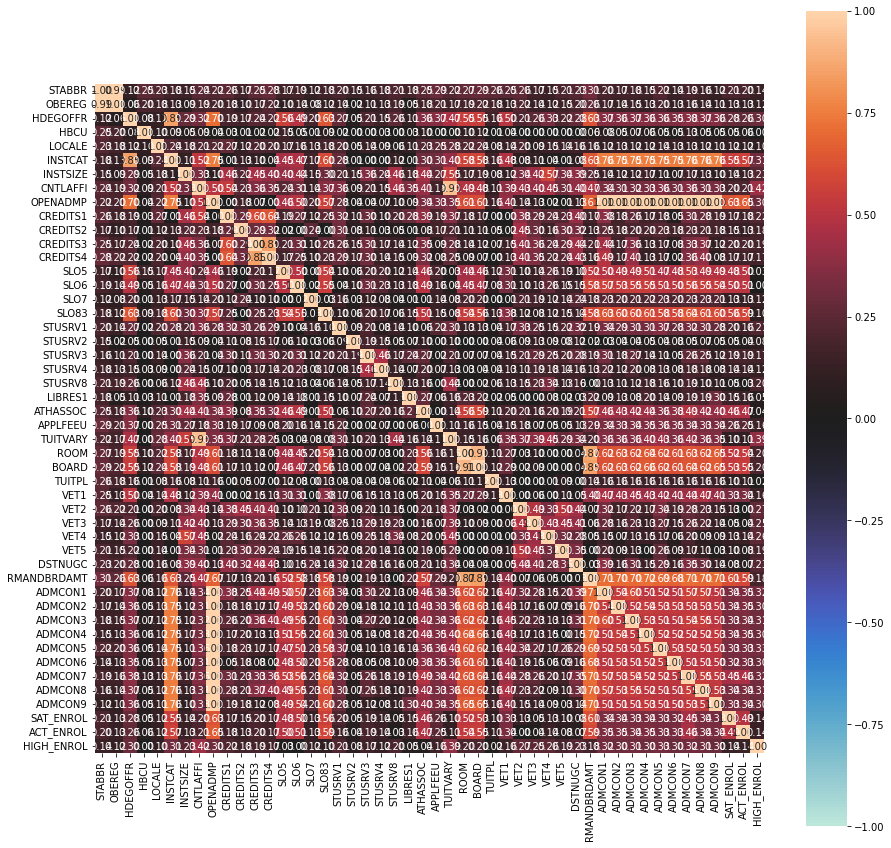

{'ax': <AxesSubplot:>,
 'corr':                STABBR    OBEREG  HDEGOFFR      HBCU    LOCALE   INSTCAT  \
 STABBR       1.000000  0.993259  0.123024  0.250763  0.228083  0.175740   
 OBEREG       0.993259  1.000000  0.057305  0.200795  0.177605  0.130270   
 HDEGOFFR     0.123024  0.057305  1.000000  0.084914  0.124142  0.848144   
 HBCU         0.250763  0.200795  0.084914  1.000000  0.102441  0.086992   
 LOCALE       0.228083  0.177605  0.124142  0.102441  1.000000  0.240878   
 INSTCAT      0.175740  0.130270  0.848144  0.086992  0.240878  1.000000   
 INSTSIZE     0.149454  0.085765  0.288777  0.053711  0.176974  0.111044   
 CNTLAFFI     0.242589  0.190478  0.315977  0.090295  0.209510  0.517508   
 OPENADMP     0.221982  0.202473  0.703400  0.038642  0.219477  0.749396   
 CREDITS1     0.255085  0.176490  0.192747  0.028844  0.267859  0.014827   
 CREDITS2     0.169626  0.102568  0.168124  0.008722  0.118714  0.132277   
 CREDITS3     0.251923  0.170623  0.237087  0.016190  0.2

In [ ]:
# plt.figure(figsize=(15, 15))
associations(df_2020cl, figsize=(15, 15))

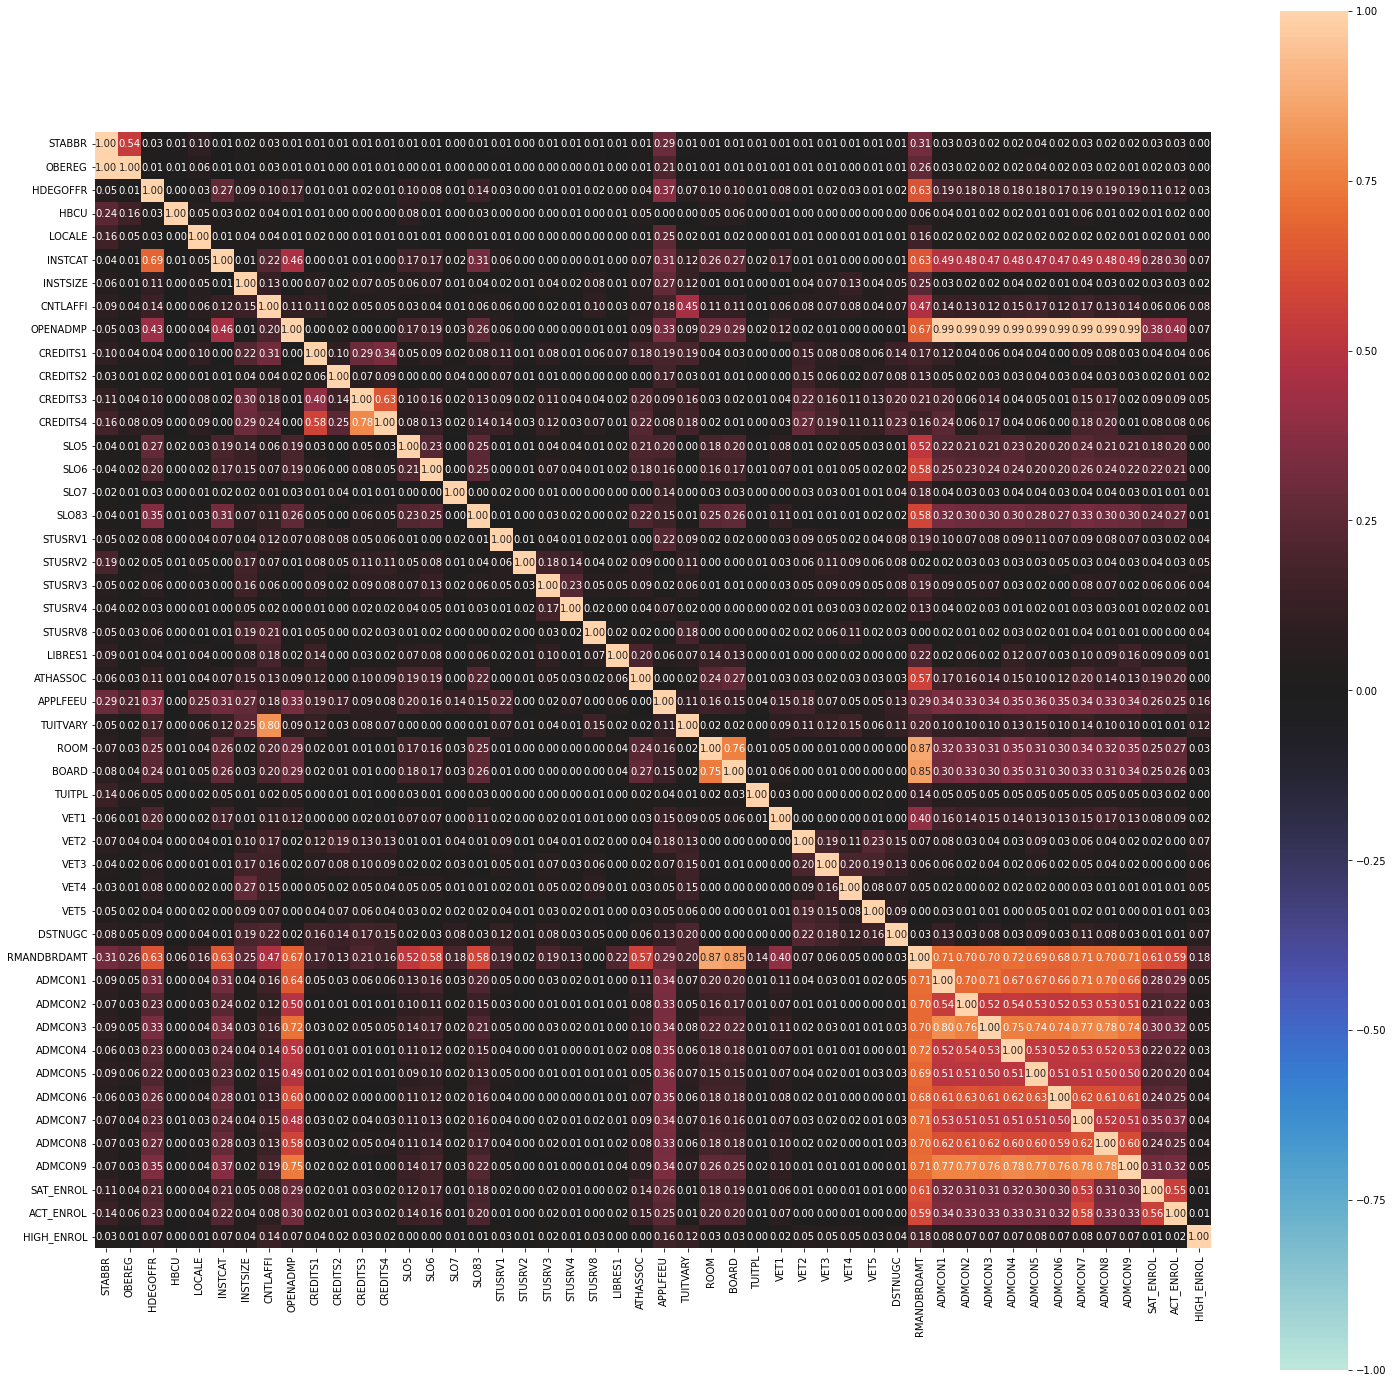

{'ax': <AxesSubplot:>,
 'corr':                STABBR    OBEREG  HDEGOFFR          HBCU    LOCALE   INSTCAT  \
 STABBR       1.000000  0.540462  0.025389  9.024038e-03  0.096566  0.006960   
 OBEREG       1.000000  1.000000  0.008400  1.095836e-02  0.061783  0.005019   
 HDEGOFFR     0.053599  0.009584  1.000000  2.677255e-03  0.034630  0.272847   
 HBCU         0.243160  0.159589  0.034172  1.000000e+00  0.053216  0.034751   
 LOCALE       0.158449  0.054790  0.026916  3.240559e-03  1.000000  0.014115   
 INSTCAT      0.036897  0.014380  0.685151  6.836722e-03  0.045601  1.000000   
 INSTSIZE     0.055437  0.013431  0.108957  2.303184e-03  0.054975  0.005043   
 CNTLAFFI     0.090422  0.044799  0.141023  4.834612e-03  0.062629  0.122114   
 OPENADMP     0.048885  0.031945  0.425891  1.465683e-03  0.038499  0.457751   
 CREDITS1     0.096016  0.040210  0.041438  1.748969e-03  0.095838  0.000653   
 CREDITS2     0.033175  0.009326  0.022203  3.365612e-04  0.013245  0.013238   
 CREDITS3

In [ ]:
associations(df_2020cl, nom_nom_assoc='theil', figsize=(25, 25))

# https://github.com/shakedzy/dython
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [ ]:
# https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [ ]:
df_2020cl.head()

STABBR OBEREG HDEGOFFR HBCU LOCALE INSTCAT INSTSIZE CNTLAFFI OPENADMP  \
31123     AK      8       30    2     32       2        1        4        1   
31126     AK      8       13    2     11       2        1        4        2   
34030     AK      8       30    2     41       1        1        1        1   
34088     AK      8       40    2     41       1        1        4        1   
31125     AK      8       20    2     33       2        2        1        2   

      CREDITS1  ... ADMCON3 ADMCON4 ADMCON5 ADMCON6 ADMCON7 ADMCON8 ADMCON9  \
31123        1  ...       0       0       0       0       0       0       0   
31126        1  ...       1       2       3       3       3       1       3   
34030        1  ...       0       0       0       0       0       0       0   
34088        1  ...       0       0       0       0       0       0       0   
31125        1  ...       1       2       3       2       2       1       3   

      SAT_ENROL ACT_ENROL HIGH_ENROL  
31123         0         0          0  
31126         0         0          0  
34030         0         0          1  
34088         0         0          0  
31125         0         0          1  

[5 rows x 48 columns]

In [ ]:
X = df_2020cl.iloc[:, :-1]
y = df_2020cl.iloc[:, -1:]


In [ ]:
X.drop(['APPLFEEU','RMANDBRDAMT'], axis =1, inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3208 entries, 31123 to 33789
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STABBR     3208 non-null   object
 1   OBEREG     3208 non-null   object
 2   HDEGOFFR   3208 non-null   object
 3   HBCU       3208 non-null   object
 4   LOCALE     3208 non-null   object
 5   INSTCAT    3208 non-null   object
 6   INSTSIZE   3208 non-null   object
 7   CNTLAFFI   3208 non-null   object
 8   OPENADMP   3208 non-null   object
 9   CREDITS1   3208 non-null   object
 10  CREDITS2   3208 non-null   object
 11  CREDITS3   3208 non-null   object
 12  CREDITS4   3208 non-null   object
 13  SLO5       3208 non-null   object
 14  SLO6       3208 non-null   object
 15  SLO7       3208 non-null   object
 16  SLO83      3208 non-null   object
 17  STUSRV1    3208 non-null   object
 18  STUSRV2    3208 non-null   object
 19  STUSRV3    3208 non-null   object
 20  STUSRV4    3208 non-null 

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3208 entries, 31123 to 33789
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   HIGH_ENROL  3208 non-null   object
dtypes: object(1)
memory usage: 50.1+ KB


### Furthermore let us relable our target variable so that we pre-process this separately 

In [ ]:
# https://scikit-learn.org/stable/modules/preprocessing_targets.html
# https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362

# le = preprocessing.LabelEncoder()
# # y_1=df_2020cl.iloc[:, -1:].values()
# le.fit(df_2020cl.iloc[:, -1:])

# list(le.classes_)

# # y = le.transform(df_2020cl.iloc[:, -1:])

# # list(le.inverse_transform(y)) # To get back original values for y
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_scaled = le.transform(y_train)
  y_test_scaled = le.transform(y_test)
  y_train_scaled.reshape(-1,1)
  y_test_scaled.reshape(-1,1)
  return y_train_scaled, y_test_scaled


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.columns

Index(['STABBR', 'OBEREG', 'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE',
       'CNTLAFFI', 'OPENADMP', 'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4',
       'SLO5', 'SLO6', 'SLO7', 'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3',
       'STUSRV4', 'STUSRV8', 'LIBRES1', 'ATHASSOC', 'TUITVARY', 'ROOM',
       'BOARD', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',
       'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6',
       'ADMCON7', 'ADMCON8', 'ADMCON9', 'SAT_ENROL', 'ACT_ENROL'],
      dtype='object')

In [ ]:
y_train.shape, y_test.shape

((2245, 1), (963, 1))

In [ ]:
X_train.shape, X_test.shape

((2245, 45), (963, 45))

In [ ]:

# f_classif

In [ ]:
# https://scikit-learn.org/0.15/modules/model_evaluation.html
# https://datascience.stackexchange.com/questions/93751/valueerror-classification-metrics-cant-handle-a-mix-of-multilabel-indicator-an

# numeric_features = ['APPLFEEU','RMANDBRDAMT']
# numeric_transformer = RobustScaler()
# scores=[]
def select_features(X_train, y_train, X_test):
  # scores=[]
  fs = SelectKBest(score_func=chi2, k=10)  # fs = SelectKBest(score_func=f_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  features_in = fs.n_features_in_
  scores=(fs.scores_)
  print(scores)
  print(features_in)
  names_out=fs.get_feature_names_out()
  sup_features=fs.get_support(indices=True)
  print(names_out)
  print(sup_features)
  # new_X=fs.inverse_transform(X_train_fs)
  # print(new_X)
  # names_in= fs.feature_names_in_ #Throws an error as if attribute does not exist but it is in the sklearn function description
  # print(names_in)
  return scores, X_train_fs, X_test_fs

categorical_features = ['STABBR','OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9', 'SAT_ENROL','ACT_ENROL']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  #("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_y = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# X_train_scaled1=pd.DataFrame(X_train_scaled)
# X_test_scaled1=pd.DataFrame(X_test_scaled)

# prepare_targets(y_train, y_test)
# y_test_scaled=np.ravel(y_test_scaled)
# y_train_scaled=np.ravel(y_train_scaled)
# y_test_scaled=y_test_scaled.reshape(-1,1)
# y_train_scaled=y_train_scaled.reshape(-1,1)
# y_test_scaled,y_train_scaled
select_features(X_train_scaled, y_train_scaled, X_test_scaled)

# print(scores)
# print(fs.fs.feature_names_in_)
# what are scores for the features
# for i in range(len(scores)):
# 	print('Feature %d: %f', (i, scores[i]))
# plot the scores
# plt.bar([i for i in range(len(scores))], scores)
# plt.show()

# # y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
# # y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

# # y_train_scaled1=pd.DataFrame(y_train_scaled)
# # y_test_scaled1=pd.DataFrame(y_test_scaled)





# # y_test_scaled1 = scaler_y.inverse_transform(y_test_scaled1)
# # print('Confusion Matrix')
# # conf_matrx=multilabel_confusion_matrix(y_test_scaled1, ypred)
# # print(conf_matrx)



# # from sklearn.metrics import ConfusionMatrixDisplay
# # from sklearn import metrics

# # result = multilabel_confusion_matrix(y_test_scaled1, ypred)
# # print('Confusion Matrix: ')
# # print(result)
# cols = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA','HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
#         'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM','NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
#         'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

# result1 = classification_report(y_test_scaled1, ypred, target_names=cols)
# print('Classification Report: ',)
# print (result1)
# result2 = accuracy_score(y_test_scaled1, ypred)
# print('Accuracy: ',result2)

# from sklearn.metrics import confusion_matrix

# plt.figure(figsize=(15, 15))
# # labels = np.zeros_like(ypred)
# accuracy_score(y_test, ypred)
# mat = confusion_matrix(y_test, ypred)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="PiYG",
#             xticklabels=cols,
#             yticklabels=cols)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

# # plt.figure(figsize=(15, 15))
# # labels = np.zeros_like(ypred)
# # # accuracy_score(y_test, ypred)
# # mat = confusion_matrix(y_test, labels)
# # sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="PiYG",
# #             xticklabels=cols,
# #             yticklabels=cols)
# # plt.xlabel('true label')
# # plt.ylabel('predicted label');

[1.98347219e-01 4.77957128e-02 8.70737655e-01 8.47672998e+00
 7.40391153e+00 3.08278203e-01 7.81579729e-07 4.13542302e+00
 1.09896363e-02 1.08271472e+00 2.18181941e+00 7.10105826e-01
 1.19059657e+00 7.60236740e-02 2.53759756e+00 3.78243679e+00
 3.97353982e-01 1.93879970e+00 1.09090971e+00 5.67365518e+00
 4.79037890e-01 8.71484696e-01 7.74956172e-05 2.37443174e+00
 5.04324905e+00 5.85377309e+00 1.56644393e-01 4.52643037e-01
 3.38620199e-01 4.21598151e+00 3.29689088e-02 1.66369880e+00
 6.94215268e-01 9.82737249e-01 5.79863098e+00 8.07738614e-02
 1.49174016e+00 1.60542827e+00 8.22274934e+00 5.13513514e+00
 4.77957128e-02 3.33988123e-02 4.44623635e+00 2.04300345e+00
 4.95868048e-01 1.00958040e-01 2.97520829e-01 4.47435239e+00
 1.21955303e+00 1.45312001e+00 6.40556797e-01 1.56282728e+00
 1.33566357e+01 4.81828637e-01 3.24934265e+00 1.92707146e-02
 4.31022305e+00 1.22570221e-01 1.46905471e+01 4.82575943e+00
 1.76569227e+01 7.89822825e+00 1.45018824e+01 1.60173532e+01
 1.13603835e+01 1.326124

(array([1.98347219e-01, 4.77957128e-02, 8.70737655e-01, 8.47672998e+00,
        7.40391153e+00, 3.08278203e-01, 7.81579729e-07, 4.13542302e+00,
        1.09896363e-02, 1.08271472e+00, 2.18181941e+00, 7.10105826e-01,
        1.19059657e+00, 7.60236740e-02, 2.53759756e+00, 3.78243679e+00,
        3.97353982e-01, 1.93879970e+00, 1.09090971e+00, 5.67365518e+00,
        4.79037890e-01, 8.71484696e-01, 7.74956172e-05, 2.37443174e+00,
        5.04324905e+00, 5.85377309e+00, 1.56644393e-01, 4.52643037e-01,
        3.38620199e-01, 4.21598151e+00, 3.29689088e-02, 1.66369880e+00,
        6.94215268e-01, 9.82737249e-01, 5.79863098e+00, 8.07738614e-02,
        1.49174016e+00, 1.60542827e+00, 8.22274934e+00, 5.13513514e+00,
        4.77957128e-02, 3.33988123e-02, 4.44623635e+00, 2.04300345e+00,
        4.95868048e-01, 1.00958040e-01, 2.97520829e-01, 4.47435239e+00,
        1.21955303e+00, 1.45312001e+00, 6.40556797e-01, 1.56282728e+00,
        1.33566357e+01, 4.81828637e-01, 3.24934265e+00, 1.927071

### As we can see setting the number of k clusters to the total number of US States does not lead to a good level of accuracy. 
### This seems like a reasonable result as the institutions' characteristics are not specific to the State the institution is located in.

### Let us pick a k number of clusters equal to 9 next, which corresponds to the number of Economic Areas the US is normally subdivided into.
 
### The Accuracy of our model almost triples, yet the results are still very low in terms of accuracy. 

### While this may be disappointing it still is not suprising since the features we are looking at are not characteristically tied to the particular location where an institution resides. Many of the features chosen in fact reflect Federal level programs that are adopted across the board  by many institutions across the US. 

### Repeating the clustering exercise for a number of clusters between 2 and 50 the total number of States we see the range of possible results per State (see below) 
### However, in order to select the k value that is best, we will use a mathematical method: we will look at the Within CLusters Sum of Squares (which is a measure of how dense the clusters are) and try to minimize this function using gradient descent to identify the best number of clusters the data aggregates into.

[-33866.38413032 -28530.35813046 -18354.63569029 -13446.64140215
 -10848.49210815  -6486.15540763  -4902.17066405  -3957.8650279
  -2757.85560815  -2531.54407178  -2417.99909476  -2490.0875163
  -2071.15885792  -1647.98441348  -1138.86894111  -1055.80937496
  -1036.14322698  -1141.00228114  -1291.88299381   -926.71776465
   -861.57069629   -713.84422591   -588.64790644   -784.76157364
   -826.61550717   -550.32352618   -362.33535777   -347.83528334
   -429.27599018   -341.91230717   -220.53323949   -277.18724275
   -457.61981569   -430.59326316   -371.72261067   -341.10614417
   -289.8685767    -235.82246655   -200.84779605   -251.79815517
   -198.61444523   -186.91264117   -224.54482018   -240.20969142
   -175.22549208   -177.79505637   -221.77301168   -144.12504409
   -113.59499105]


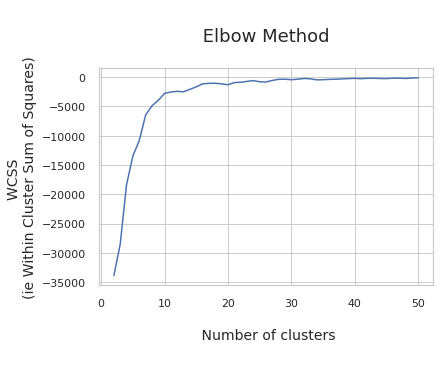

In [ ]:
# https://scikit-learn.org/0.15/modules/model_evaluation.html
# https://datascience.stackexchange.com/questions/93751/valueerror-classification-metrics-cant-handle-a-mix-of-multilabel-indicator-an
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203


numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
numeric_transformer = RobustScaler()


categorical_features = ['OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_y = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled1=pd.DataFrame(X_train_scaled)
X_test_scaled1=pd.DataFrame(X_test_scaled)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

y_train_scaled1=pd.DataFrame(y_train_scaled)
y_test_scaled1=pd.DataFrame(y_test_scaled)

max_nb_clusters = 50
min_nb_clusters = 2 

inertias = np.zeros(shape=(max_nb_clusters - min_nb_clusters+1,))

wcss = [] # Within Cluster Sum of Squares (WCSS)
for i in range(min_nb_clusters, max_nb_clusters+1):
  k_means=KMeans(n_clusters=i,random_state=42)
  k_means.fit(X_train_scaled1)
  inertias[i - min_nb_clusters] =k_means.inertia_
  wcss.append(k_means.inertia_)
  # print(wcss)
j = np.gradient(wcss)
print(j) 

plt.plot(range(min_nb_clusters, max_nb_clusters+1), j)
plt.title('\n Elbow Method \n', fontsize=18)
plt.xlabel('\n Number of clusters\n', fontsize = 14)
plt.ylabel('WCSS \n(ie Within Cluster Sum of Squares)', fontsize=14)
plt.show()
 
 # The graph shows the  plot of the gradient of the intertia as a function of the number of clusters. 
 # NOTE: The intertia is the intra-cluster average distance between the data and   the centroid  of each cluster
 # The objective  when creating clusters is to minimize such distance ( because this leads to clusters with high density well separated from each other )
 # The values of the gradient are negative and this indicates that the function is decreasing. As the number of clusters increases the gradient values tend to zero 
 # which means that the slope tends to zero which means that we reached a minimum for the original function 

 # If we look closely at the graph we see a first change in slope of the graph around n =3 and then a more significant change in slope at n =9 

### The graph shows the  plot of the gradient of the intertia as a function of the number of clusters. 

### NOTE: The intertia is the intra-cluster average distance between the data and   the centroid  of each cluster (WIthin CLuster Sum of Squares)

### The objective  when creating clusters is to minimize such distance ( because this leads to clusters with high density well separated from each other )
### The values of the gradient are negative throughout which indicates that the function is decreasing. As the number of clusters increases the gradient values tend to zero which means that the slope of the WCSS function tends to zero which means that we reached a minimum for the original function 

### If we look closely at the graph we see a first change in slope of the Elbow Function around n =3 and then a more significant change in slope at n =9 - This would seem to indicate that these two values for the number of clusters are good candidates. 
### Let's check them individually below

In [ ]:
# https://scikit-learn.org/0.15/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score

numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
numeric_transformer = RobustScaler()


categorical_features = ['OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_y = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled1=pd.DataFrame(X_train_scaled)
X_test_scaled1=pd.DataFrame(X_test_scaled)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

y_train_scaled1=pd.DataFrame(y_train_scaled)
y_test_scaled1=pd.DataFrame(y_test_scaled)


n=[3, 9]
for i in n:
  k_means=KMeans(n_clusters=i,random_state=42)
  k_means.fit(X_train_scaled1,y_train_scaled1)
  ypred = k_means.predict(X_test_scaled1) 

  homo_score = homogeneity_score(y_test, ypred)
  print("\n Homogeneity score for ",i," number of clusters is: ", homo_score)

  compl_score = completeness_score(y_test, ypred)
  print("\n Completeness score for ",i," number of clusters is: ", compl_score)
  
#   plt.figure(figsize=(15, 15))
# # labels = np.zeros_like(ypred)
# # accuracy_score(y_test, ypred)
#   mat = confusion_matrix(y_test, ypred)
#   sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="PiYG", xticklabels=cols, yticklabels=cols)
#   plt.xlabel('true label')
#   plt.ylabel('predicted label');


# # type(ypred) # numpy ndarray (963,)
# # type(y_test_scaled1)  # PANDAS CORE DF # y_test_scaled1 = scaler_y.inverse_transform(y_test_scaled1)

# # ypred.shape  #(963,) ### NOW w Flatten (963,)
# y_test_scaled1.shape # (963, 51) # Must be one dimensional 

  # y_test_scaled1
# y_test_scaled1.shape # (963, 1) #### NOW (963, 51)
  # y_test_scaled1 = scaler_y.inverse_transform(y_test_scaled1) #.flatten()


# adj_rand_score = adjusted_rand_score(y_test_scaled1, ypred)
# print("\n Adjusted Rand score: ", compl_score)

# The Adjusted Rand Score is the Rand index corrected for chance. It is bounded between -1 and 1 
# Values  closer to -1 are worst.
# Vlues close to 1 indicate that the algorithm correctly reproduces the ground truth - 

# w 9 clusters:
#  Homogeneity score:  0.055197100287788896

#  Completeness score:  0.16611741657106238
# n=[3, 9]
# for i in n:
#   k_means=KMeans(n_clusters=3,random_state=42)

# k_means.fit(X_train_scaled1,y_train_scaled1)

# ypred = k_means.predict(X_test_scaled1).flatten()

# # ypred.shape  #(963,)
# # y_test_scaled1.shape # (963, 51) # Must be one dimensional 

# y_test_scaled1 = scaler_y.inverse_transform(y_test_scaled1).flatten()
# # y_test_scaled1.shape # (963, 1)

# homo_score = homogeneity_score(y_test_scaled1, ypred)
# print("\n Homogeneity score: ", homo_score)

# compl_score = completeness_score(y_test_scaled1, ypred)
# print("\n Completeness score: ", compl_score)



 Homogeneity score for  3  number of clusters is:  0.014248303042747839

 Completeness score for  3  number of clusters is:  0.14278748498749405

 Homogeneity score for  9  number of clusters is:  0.061008851548517026

 Completeness score for  9  number of clusters is:  0.16450784727727924


###the Homogeinety score confirms that the clusters are NOT very homogenous (the score ranges from 0 to 1)  with low values indicating low homogeneity. 
### The result does not seem all that surprising since We used States as our targets and as mentioned the institutions tend to adopt the same federal programs across States. 
### The completeness score which is complementary to the homogeneity score, and also ranges from 0 to 1, indicates how well the algorithm is assigning samples with the same true labels to the same cluster. 
### Again our algorythm is not performing very well.  

### Checking these same values for a number of clusters equal to 3 (instead of 9) improves our outcomes in terms of Completeness Score (but not Homogeneity Score which actually is smaller)

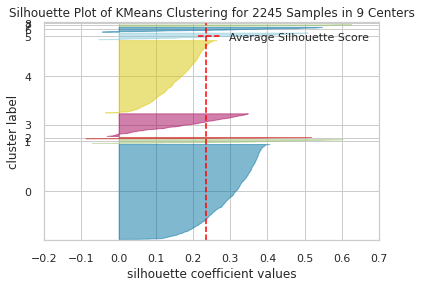

In [ ]:
# # https://scikit-learn.org/0.15/modules/model_evaluation.html
# # https://datascience.stackexchange.com/questions/93751/valueerror-classification-metrics-cant-handle-a-mix-of-multilabel-indicator-an
# # https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
numeric_transformer = RobustScaler()


categorical_features = ['OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_y = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled1=pd.DataFrame(X_train_scaled)
X_test_scaled1=pd.DataFrame(X_test_scaled)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

y_train_scaled1=pd.DataFrame(y_train_scaled)
y_test_scaled1=pd.DataFrame(y_test_scaled)

k_means=KMeans(n_clusters=9,random_state=42)

k_means.fit(X_train_scaled1,y_train_scaled1)

ypred = k_means.predict(X_test_scaled1).flatten()

from sklearn.metrics import silhouette_samples


# Use the quick method and immediately show the figure

silhouette_visualizer(KMeans(9, random_state=42), X_train_scaled1, colors='yellowbrick')
print("")
# silhouette_visualizer(KMeans(3, random_state=42), X_train_scaled1, colors='yellowbrick')


### Visualizing the Sihouette Score seems to confirm that the number of clusters is three as the highest score is associated with this k value 

### Using Nearest Neighbors Classifier we see that for this classifier the aggregation of the data in classes (groups) of about  9  neighbors ~ or about 5-6 clusters of States

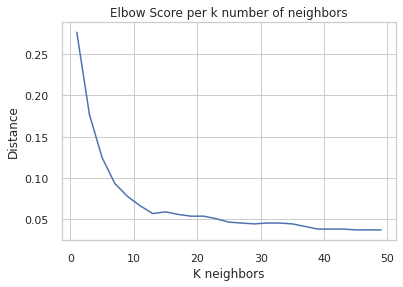

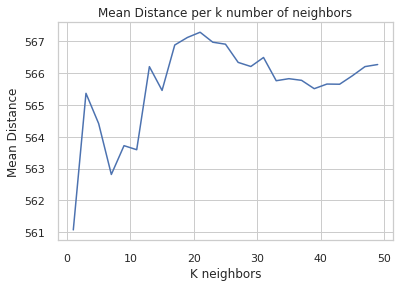


[0.2762201453790239, 0.17653167185877466, 0.12461059190031153, 0.09345794392523364, 0.0778816199376947, 0.06645898234683281, 0.05711318795430945, 0.059190031152647975, 0.056074766355140186, 0.05399792315680166, 0.05399792315680166, 0.05088265835929388, 0.04672897196261682, 0.04569055036344756, 0.0446521287642783, 0.04569055036344756, 0.04569055036344756, 0.0446521287642783, 0.04153686396677051, 0.03842159916926272, 0.03842159916926272, 0.03842159916926272, 0.037383177570093455, 0.037383177570093455, 0.037383177570093455]
[561.0692650334075, 565.3633528807259, 564.4121997233007, 562.812378927783, 563.7180877641241, 563.5907540728552, 566.2020127406935, 565.4546763923278, 566.882277185704, 567.1194195500694, 567.2835815925677, 566.9700874325003, 566.9081528950501, 566.3356549266568, 566.2069309882779, 566.4899452947066, 565.7595440890423, 565.8237215204892, 565.7716306733263, 565.5093293151036, 565.6547080766213, 565.6492161528064, 565.9136882251022, 566.202981770896, 566.2685562719041]

In [ ]:
# https://medium.com/analytics-vidhya/summary-of-knn-algorithm-when-used-for-classification-4934a1040983#:~:text=The%20main%20advantage%20of%20KNN,can%20be%20a%20suitable%20algorithm.
# https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76
# https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
numeric_transformer = RobustScaler()


categorical_features = ['OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_y = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled1=pd.DataFrame(X_train_scaled)
X_test_scaled1=pd.DataFrame(X_test_scaled)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

y_train_scaled1=pd.DataFrame(y_train_scaled)
y_test_scaled1=pd.DataFrame(y_test_scaled)


n_neighbors = range(1,51, 2)
score_per_k_neighbors = []
distance_per_k_neighbors = []
silhouette_per_k_neighbors=[]
# 
for k in n_neighbors:
  model = KNeighborsClassifier(n_neighbors=k, p=2, n_jobs=1)
  # model = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
  model.fit(X_train_scaled1, y_train_scaled1)
  ypred = model.predict(X_test_scaled1)
  # print('Distance: ', model.kneighbors(X_train_scaled1, n_neighbors=k), 'for ', k)
  result3 = model.kneighbors(X_train_scaled1, n_neighbors=k)
  distance_per_k_neighbors.append(np.mean(result3))
  # print('Accuracy:',metrics.accuracy_score(y_test_scaled1, ypred), 'for ',k)
  result2 = metrics.accuracy_score(y_test_scaled1, ypred)
  score_per_k_neighbors.append(result2)
  # silhouette = np.mean(silhouette_score(y_test_scaled1, ypred))
  # silhouette_per_k_neighbors.append(silhouette)


plt.plot(n_neighbors, score_per_k_neighbors, 'bx-')
plt.xlabel('K neighbors')
plt.ylabel('Distance')
plt.title('Elbow Score per k number of neighbors')
plt.show()
print('')
plt.plot(n_neighbors, distance_per_k_neighbors, 'bx-')
plt.xlabel('K neighbors')
plt.ylabel('Mean Distance')
plt.title('Mean Distance per k number of neighbors')
plt.show()
print('')
# plt.plot(n_neighbors, silhouette_per_k_neighbors, 'bx-')
# plt.xlabel('K neighbors')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score per k number of neighbors')
# plt.show()
print(score_per_k_neighbors)
print(distance_per_k_neighbors)
# print(silhouette_per_k_neighbors)




**DBSCAN**

### Let us move onto applying DBSCAN 

### In order to do so we need to select  two parameters: (1) epsilon (based on which's value the total number of clusters will depend); and (2) the number of samples (this value should be at least equal to the number of features and when the data is chracaterized by the presence of outliers, it may be useful to select an even higher value for this parameter - as we know, increasing the number of samples increases the sampling distributions' chances to reflect the true population of data)

### Trying to implement DBSCAN THEN Let us first try to reduce the dimensions of our data. We will in other words use PCA Principal Component Analysis, to reduce our data dimensionality while not loosing the information from  all of our data features. (We are not eliminating features but rather extracting the principal components from all features that affect our output data) 
### However, we must keep in mind that this approach will prevent us from identifying the features having the greatest influence on our outcome/target data. 
### The primary reason for us to use this algorithm is to be then able to visualize the data with DBSCAN  and verify if there are meaningful clusters of data formed.   

No handles with labels found to put in legend.


Increase in Explained Variance with every additional principal component:  [0.70516491 0.14487801 0.0389216 ]

This is the original data fed to the model: 
 [[-1.99827428e-01 -3.31239325e-01 -2.85892461e+00 ... -6.18856315e-03
  -3.58073763e-01 -7.86546016e-03]
 [-1.35036191e-01 -1.93435532e-01 -2.89649436e+00 ... -2.58558112e-03
  -2.05072237e-01 -4.21957142e-03]
 [-1.95958417e-01 -3.21760833e-01 -2.89866149e+00 ... -5.88437707e-03
  -3.47589336e-01 -7.61052380e-03]
 ...
 [-2.53924440e-01 -4.46719508e-01 -2.81310419e+00 ... -9.20732233e-03
  -4.86417370e-01 -1.09286617e-02]
 [ 8.39262679e-02  2.63774077e-01 -2.76555222e+00 ...  9.01653801e-03
   3.02602714e-01  7.83808213e-03]
 [-1.92211573e-01 -3.13217558e-01 -2.91891770e+00 ... -5.64444465e-03
  -3.38054765e-01 -7.37946958e-03]] 



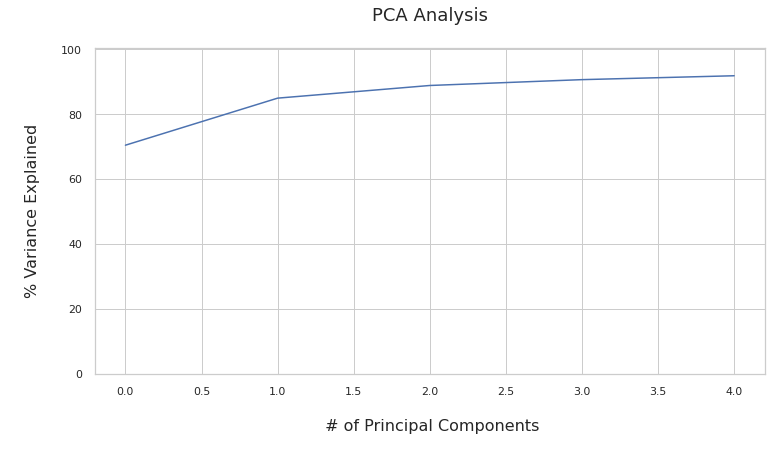

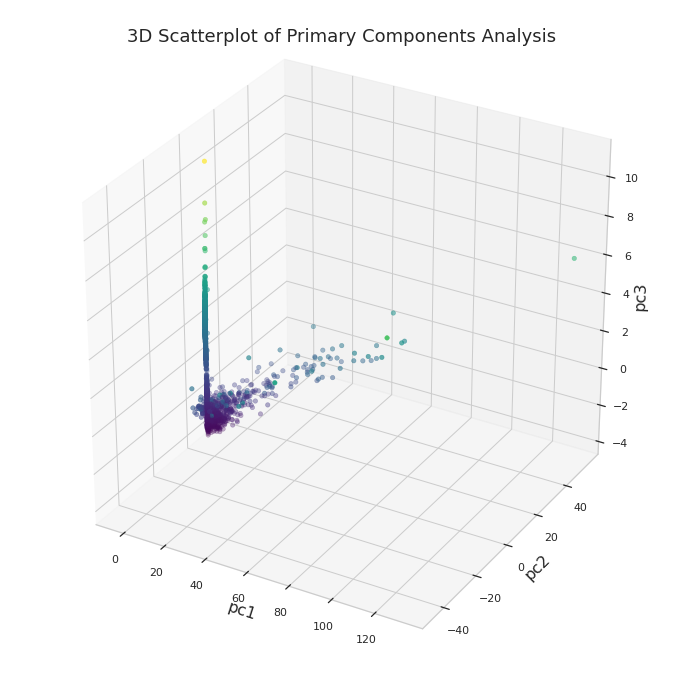

<Figure size 432x288 with 0 Axes>

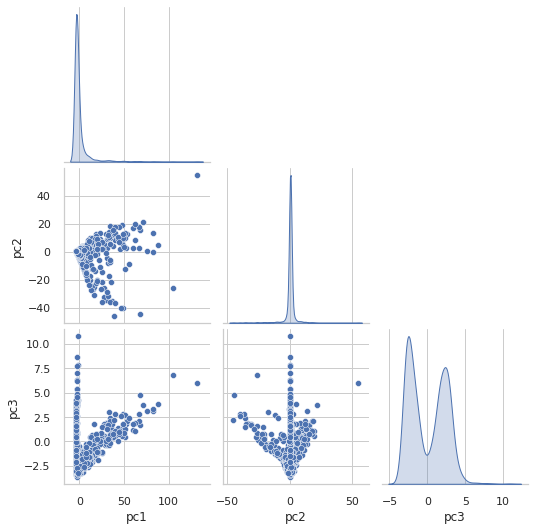

In [ ]:


# https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31
# https://vitalflux.com/feature-extraction-pca-python-example/
# https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a
# https://medium.com/@mayureshrpalav/principal-component-analysis-feature-extraction-technique-3f480d7b9697
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# https://stackoverflow.com/questions/30223161/matplotlib-mplot3d-how-to-increase-the-size-of-an-axis-stretch-in-a-3d-plo


numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
numeric_transformer = RobustScaler()


categorical_features = ['OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_y = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled1=pd.DataFrame(X_train_scaled)
X_test_scaled1=pd.DataFrame(X_test_scaled)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

y_train_scaled1=pd.DataFrame(y_train_scaled)
y_test_scaled1=pd.DataFrame(y_test_scaled)




pca = PCA(n_components=5)
# X_train_pca = pca.fit(X_train_scaled1)
pca.fit(X_train_scaled1)
# X_test_pca = pca.fit(X_test_scaled1)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('\n% Variance Explained\n', fontsize = 16)
plt.xlabel('\n # of Principal Components\n', fontsize = 16)
plt.title('PCA Analysis\n', fontsize=18)
plt.ylim(0,100.5)
plt.plot(var)
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/PCA_Analysis.png")

# Looking at a total of three pricipal components 
pca2 = PCA(n_components=3)
# X_train_pca = pca2.fit(X_train_scaled1)
# X_test_pca = pca2.fit(X_test_scaled1)
pca2.fit(X_train_scaled1)
pca_scale_result = pca2.transform(X_train_scaled1)
pca_df = pd.DataFrame(pca_scale_result, columns=['pc1', 'pc2', 'pc3'])
print("Increase in Explained Variance with every additional principal component: ", pca2.explained_variance_ratio_)
pca_df


# data_reduced = np.dot(data, pca.components_.T) # transform
data_original = np.dot(pca_scale_result, pca2.components_) # inverse_transform
print("\nThis is the original data fed to the model: \n", data_original,"\n")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
# ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = pca_df['pc3']
xdata = pca_df['pc1']
ydata = pca_df['pc2']

### SCALING ONE LINER 
# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2,2, 2, 2]))


# # # Change the viewing angle to an agreeable one
# ax.view_init(2,None)

ax.scatter(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=0.5);

# ax.contour3D(xdata, ydata, zdata, 50, cmap='binary')
ax.set_title('\n3D Scatterplot of Primary Components Analysis\n', fontsize=18)
ax.set_xlabel('\npc1\n', fontsize=16)
ax.set_ylabel('\npc2\n', fontsize=16)
ax.set_zlabel('\npc3\n', fontsize=16);

# ax.plot(z, y, x, label='parametric curve')
ax.legend()

plt.show()
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/PCA_Analysis_Scatterplot3D.png")

#Seaborn pair plot
# sns.pairplot(pca_df, hue='pc1')

# sns.pairplot(pca_df, corner=True)

g = sns.pairplot(pca_df, diag_kind="kde", corner=True)
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/PCA_Pairplots.png")
# g.map_lower(sns.kdeplot, levels=1, color=".2")

# # Save image as a png file # # # 
# plt.savefig("plot.png")



# db = DBSCAN(eps=9, min_samples=51).fit(pca_df)
# labels = db.labels_
# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)
# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_df, labels))



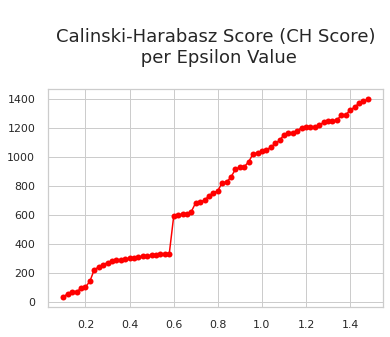

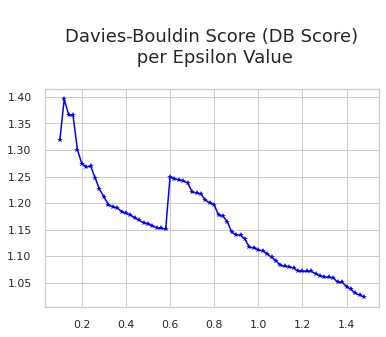

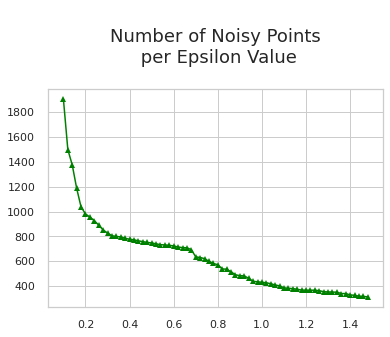

<Figure size 432x288 with 0 Axes>

In [ ]:
x_eps=[]
ch =[]
db=[]
no=[]

for e in np.arange(0.1, 1.5, 0.02):
  dbscan1=  DBSCAN(eps=e, min_samples=51)
  ypred_db =dbscan1.fit_predict(pca_df)
  x_eps.append(e)
  ch.append(calinski_harabasz_score(pca_df, ypred_db))
  db.append(davies_bouldin_score(pca_df, ypred_db))
  no.append(np.sum(ypred_db==-1))
  # print(ch)
plt.plot(x_eps, ch, color = "red", marker = "o", label = "Array elements")
# plt.legend()
plt.title('\nCalinski-Harabasz Score (CH Score)\n per Epsilon Value\n', fontsize=18)
plt.show()
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/CH_Scores.png")

plt.plot(x_eps, db, color = "blue", marker = "*", label = "Array elements")
# plt.legend()
plt.title('\nDavies-Bouldin Score (DB Score)\n per Epsilon Value\n', fontsize=18)
plt.show()
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/DB_Scores.png")

plt.plot(x_eps, no, color = "green", marker = "^", label = "Array elements")
# plt.legend()
plt.title('\nNumber of Noisy Points\n per Epsilon Value\n', fontsize=18)
plt.show()
plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/NO_Points.png")

### The first graph in red represents the Calinski-Harabasz Score (CH Score) which is a measure of cohesion and separation (at the same time) of the clusters. This score is not bounded (other than reaching a limit value based on the data structure), thus generally speaking, higher values of this score  indicate a better clustering result. 

### The second graph in blue represents the Davies-Bouldin Score (DB Score) which is a measure of the amount of separation existing between clusters. Lower values of the DB Score indicate better separation between clusters.

### The third graph, in green represents the number of data points classified as noise. 

### As we can see from all three graphs, there is a change in all three measures when epsilon is arounf 0.625 

### If we look at the number of noisy points when epsilon is 0.625, we see that there is a sharp change in slope of the decreasing function. This indicates that there is a sharp reduction in the number of points classified as noise at this epsilon value. 

###At the same epsilon value there is  a sharp increase in the DB Score and a sharp increase in the CH Score. All three values then indicate that the optimal value of epsilon is in fact 0.625

In [ ]:
db = DBSCAN(eps=0.625, min_samples=51)
ypredict=db.fit_predict(pca_df)
para=db.get_params()
print("")
print("No. of clusters: {}".format(np.unique(db.labels_).shape))
print("No. of noisy points: {}" .format(np.sum(ypredict==-1)))
print("CH Score ={0:.6g}" .format(calinski_harabasz_score(pca_df, ypredict)))
print("DB Score ={0:.4g}" .format(davies_bouldin_score(pca_df, ypredict)))
print(para)


No. of clusters: (2,)
No. of noisy points: 712
CH Score =600.825
DB Score =1.245
{'algorithm': 'auto', 'eps': 0.625, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 51, 'n_jobs': None, 'p': None}


In [ ]:
# Checking if changing the parameters improves our output 

db = DBSCAN(eps=0.625, min_samples=51, metric='minkowski',p=4)
ypredict=db.fit_predict(pca_df)
para=db.get_params()
print("")
print("No. of clusters: {}".format(np.unique(db.labels_).shape))
print("No. of noisy points: {}" .format(np.sum(ypredict==-1)))
print("CH Score ={0:.6g}" .format(calinski_harabasz_score(pca_df, ypredict)))
print("DB Score ={0:.4g}" .format(davies_bouldin_score(pca_df, ypredict)))
print(para)


No. of clusters: (2,)
No. of noisy points: 633
CH Score =685.389
DB Score =1.221
{'algorithm': 'auto', 'eps': 0.625, 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'min_samples': 51, 'n_jobs': None, 'p': 4}


 **Clustering by Institutional Size**

### All of the work we have done has been confirmed by our data. However, as we initially said, we chose a target feature which may have not been the best one for us given our data 
### Let us re-run this analysis choosing as target variable Institution Size to see if clearer patterns emerge then 



In [ ]:
df_2020cl.columns

Index(['STABBR', 'OBEREG', 'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE',
       'CNTLAFFI', 'OPENADMP', 'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4',
       'SLO5', 'SLO6', 'SLO7', 'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3',
       'STUSRV4', 'STUSRV8', 'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY',
       'ROOM', 'BOARD', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5',
       'DSTNUGC', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4',
       'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM',
       'ACTNUM', 'EFYTOTLT'],
      dtype='object')

In [ ]:
ys = df_2020cl.loc[:,['INSTSIZE']]
# 
Xs = df_2020cl.loc[:,['STABBR', 'OBEREG', 'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 
                 'CNTLAFFI', 'OPENADMP', 'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4',
                 'SLO5', 'SLO6', 'SLO7', 'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3',
                 'STUSRV4', 'STUSRV8', 'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY',
                 'ROOM', 'BOARD', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5',
                 'DSTNUGC', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4',
                 'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM','ACTNUM', 'EFYTOTLT']]

In [ ]:
# X = df_2020cl.iloc[:, 1:]
# # y = df_2020cl.iloc[:, :1]
le = preprocessing.LabelEncoder()
le.fit(ys.iloc[:, :])

list(le.classes_)

ys = le.transform(ys.iloc[:, :])

# list(le.inverse_transform(y)) # To get back original values for y

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.30, random_state=42)

### K Means  with k = Number of different institutional sizes which is five in total 
(1) INSTSIZE	1	Under 1,000
(2) INSTSIZE	2	1,000 - 4,999
(3) INSTSIZE	3	5,000 - 9,999
(4) INSTSIZE	4	10,000 - 19,999
(5) INSTSIZE	5	20,000 and above

In [ ]:
# Xs_train_scaled1.columns

Classification Report: 
                     precision    recall  f1-score   support

1	<< 1,000                0.37      1.00      0.54       292
2	1,000 - 4,999           0.00      0.00      0.00       377
3	5,000 - 9,999           0.00      0.00      0.00       134
4	10,000 - 19,999         0.28      0.34      0.31        98
5	20,000 <<               0.64      0.15      0.24        62

           accuracy                           0.35       963
          macro avg       0.26      0.30      0.22       963
       weighted avg       0.18      0.35      0.21       963

Accuracy:  0.34683281412253375
[-23211.20706272 -18626.45440892 -13418.61458282 -10543.8090176
  -6408.39391476  -4902.07411114  -4222.99300745  -2792.44541542
  -2219.945871    -2391.54757732  -2515.55385751  -1892.9195458
  -1516.2906226 ]


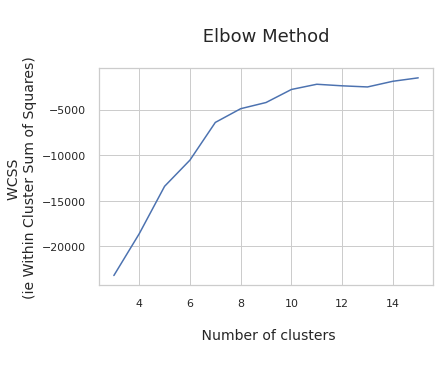

In [ ]:
numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
numeric_transformer = RobustScaler()


categorical_features = ['STABBR','OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_ys = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

Xs_train_scaled = scaler.fit_transform(Xs_train)
Xs_test_scaled = scaler.transform(Xs_test)

Xs_train_scaled1=pd.DataFrame(Xs_train_scaled)
Xs_test_scaled1=pd.DataFrame(Xs_test_scaled)

ys_train_scaled = scaler_ys.fit_transform(ys_train.reshape(-1,1))
ys_test_scaled = scaler_ys.transform(ys_test.reshape(-1,1))

ys_train_scaled1=pd.DataFrame(ys_train_scaled)
ys_test_scaled1=pd.DataFrame(ys_test_scaled)

k_means=KMeans(n_clusters=5,random_state=42)

k_means.fit_predict(Xs_train_scaled1,ys_train_scaled1)

ypreds = k_means.predict(Xs_test_scaled1)


ys_test_scaled1 = scaler_ys.inverse_transform(ys_test_scaled1)

result1 = classification_report(ys_test_scaled1, ypreds, target_names=['1	<< 1,000         ', '2	1,000 - 4,999    ', '3	5,000 - 9,999    ', '4	10,000 - 19,999  ', '5	20,000 <<        '])
print('Classification Report: ',)
print (result1)
result2 = accuracy_score(ys_test_scaled1, ypreds)
print('Accuracy: ',result2)

# INSTSIZE	1	Under 1,000
# INSTSIZE	2	1,000 - 4,999
# INSTSIZE	3	5,000 - 9,999
# INSTSIZE	4	10,000 - 19,999
# INSTSIZE	5	20,000 and above

max_nb_clusters = 15
min_nb_clusters = 3 

inertias = np.zeros(shape=(max_nb_clusters - min_nb_clusters+1,))

wcss = [] # Within Cluster Sum of Squares (WCSS)
for i in range(min_nb_clusters, max_nb_clusters+1):
  k_means=KMeans(n_clusters=i,random_state=42)
  k_means.fit(Xs_train_scaled1)
  inertias[i - min_nb_clusters] =k_means.inertia_
  wcss.append(k_means.inertia_)
  # print(wcss)
j = np.gradient(wcss)
print(j) 

plt.plot(range(min_nb_clusters, max_nb_clusters+1), j)
plt.title('\n Elbow Method \n', fontsize=18)
plt.xlabel('\n Number of clusters\n', fontsize = 14)
plt.ylabel('WCSS \n(ie Within Cluster Sum of Squares)', fontsize=14)
plt.show()
 
 # The graph shows the  plot of the gradient of the intertia as a function of the number of clusters. 
 # NOTE: The intertia is the intra-cluster average distance between the data and   the centroid  of each cluster
 # The objective  when creating clusters is to minimize such distance ( because this leads to clusters with high density well separated from each other )
 # The values of the gradient are negative and this indicates that the function is decreasing. As the number of clusters increases the gradient values tend to zero 
 # which means that the slope tends to zero which means that we reached a minimum for the original function 

 # If we look closely at the graph we see a first change in slope of the graph around n =3 and then a more significant change in slope at n =9 



In [ ]:
n=[3, 4, 5, 8]
for i in n:
  k_means=KMeans(n_clusters=i,random_state=42)
  k_means.fit(Xs_train_scaled1,ys_train_scaled1)
  ypreds = k_means.predict(Xs_test_scaled1).flatten() #.reshape(-1,1)
  # y_test_scaled1.flatten()
# ypred.shape  #(963,)
# y_test_scaled1.shape # (963, 1) # Must be one dimensional 

# y_test_scaled1 = scaler_y.inverse_transform(y_test_scaled1).flatten()
# y_test_scaled1.shape # (963, 1)

  homo_score = homogeneity_score(ys_test, ypreds) #.flatten()
  print("\n Homogeneity score for ",i," number of clusters is: ", round(homo_score, 2))

  compl_score = completeness_score(ys_test, ypreds)
  print("\n Completeness score for ",i," number of clusters is: ", round(compl_score,2))


 Homogeneity score for  3  number of clusters is:  0.13

 Completeness score for  3  number of clusters is:  0.51

 Homogeneity score for  4  number of clusters is:  0.14

 Completeness score for  4  number of clusters is:  0.42

 Homogeneity score for  5  number of clusters is:  0.15

 Completeness score for  5  number of clusters is:  0.34

 Homogeneity score for  8  number of clusters is:  0.17

 Completeness score for  8  number of clusters is:  0.2


### As we can see the results appear to be very similar- Three are the clusters the data naturally aggregates into as we would expect given our previous results, however the data is still not very homogenous

No handles with labels found to put in legend.


Increase in Explained Variance with every additional principal component:  [0.70516491 0.14487801 0.0389216 ]

This is the original data fed to the model: 
 [[-2.01908429e-01 -3.35384113e-01 -2.85500985e+00 ... -6.29827114e-03
  -3.62588648e-01 -7.94030041e-03]
 [-1.36298797e-01 -1.95977342e-01 -2.89537497e+00 ... -2.65393212e-03
  -2.07838522e-01 -4.26956851e-03]
 [-1.97652269e-01 -3.25015357e-01 -2.89800947e+00 ... -5.97225524e-03
  -3.51085162e-01 -7.66136504e-03]
 ...
 [-2.56002386e-01 -4.50690905e-01 -2.80908202e+00 ... -9.31197511e-03
  -4.90698849e-01 -1.09834165e-02]
 [ 8.43765721e-02  2.64242912e-01 -2.76622026e+00 ...  9.02636040e-03
   3.03013386e-01  7.80689640e-03]
 [-1.93983793e-01 -3.16707009e-01 -2.91621762e+00 ... -5.73713920e-03
  -3.41840601e-01 -7.43917513e-03]] 



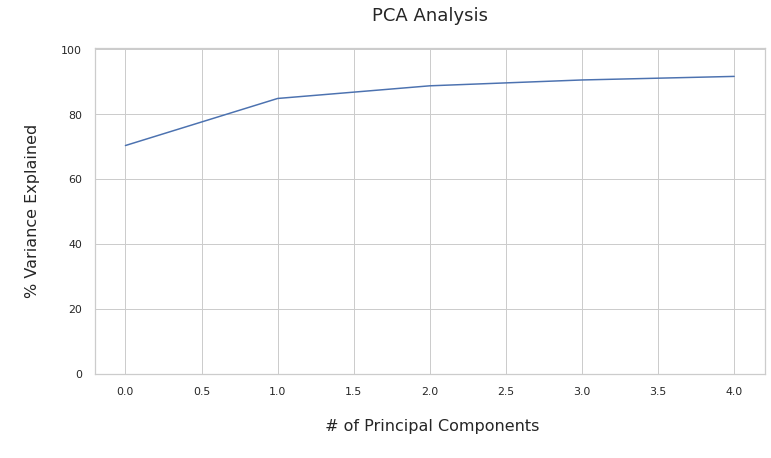

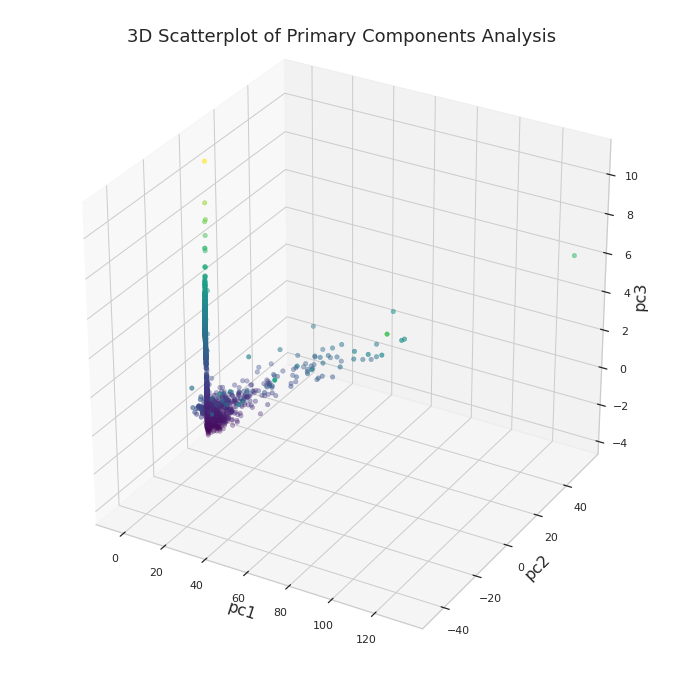

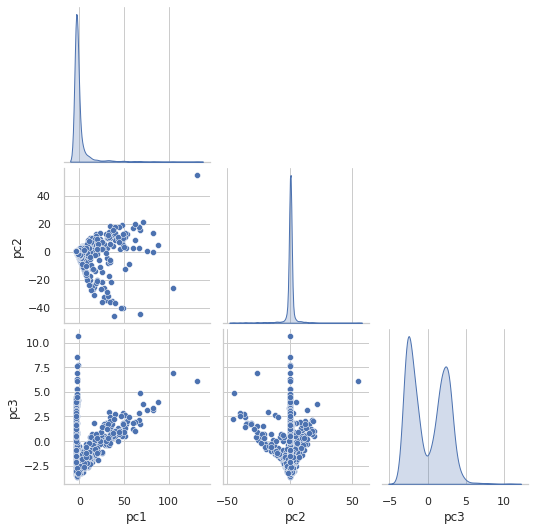

In [ ]:


# https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31
# https://vitalflux.com/feature-extraction-pca-python-example/
# https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a
# https://medium.com/@mayureshrpalav/principal-component-analysis-feature-extraction-technique-3f480d7b9697
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# https://stackoverflow.com/questions/30223161/matplotlib-mplot3d-how-to-increase-the-size-of-an-axis-stretch-in-a-3d-plo


numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
numeric_transformer = RobustScaler()


categorical_features = ['STABBR','OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_ys = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

Xs_train_scaled = scaler.fit_transform(Xs_train)
Xs_test_scaled = scaler.transform(Xs_test)

Xs_train_scaled1=pd.DataFrame(Xs_train_scaled)
Xs_test_scaled1=pd.DataFrame(Xs_test_scaled)

ys_train_scaled = scaler_ys.fit_transform(ys_train.reshape(-1,1))
ys_test_scaled = scaler_ys.transform(ys_test.reshape(-1,1))

ys_train_scaled1=pd.DataFrame(ys_train_scaled)
ys_test_scaled1=pd.DataFrame(ys_test_scaled)



pcas = PCA(n_components=5)

pcas.fit(Xs_train_scaled1)

variance_s = pcas.explained_variance_ratio_ 
var_s=np.cumsum(np.round(variance_s, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('\n% Variance Explained\n', fontsize = 16)
plt.xlabel('\n # of Principal Components\n', fontsize = 16)
plt.title('PCA Analysis\n', fontsize=18)
plt.ylim(0,100.5)
plt.plot(var_s)
# plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/PCA_Analysis.png")

# Looking at a total of three pricipal components 
pca2_s = PCA(n_components=3)
pca2_s.fit(Xs_train_scaled1)
pca_scale_result_s = pca2_s.transform(Xs_train_scaled1)
pca_s_df = pd.DataFrame(pca_scale_result_s, columns=['pc1', 'pc2', 'pc3'])
print("Increase in Explained Variance with every additional principal component: ", pca2.explained_variance_ratio_)
pca_s_df


# data_reduced = np.dot(data, pca.components_.T) # transform
data_original = np.dot(pca_scale_result_s, pca2_s.components_) # inverse_transform
print("\nThis is the original data fed to the model: \n", data_original,"\n")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
# ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = pca_s_df['pc3']
xdata = pca_s_df['pc1']
ydata = pca_s_df['pc2']

### SCALING ONE LINER 
# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2,2, 2, 2]))


# # # Change the viewing angle to an agreeable one
# ax.view_init(2,None)

ax.scatter(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=0.5);

# ax.contour3D(xdata, ydata, zdata, 50, cmap='binary')
ax.set_title('\n3D Scatterplot of Primary Components Analysis\n', fontsize=18)
ax.set_xlabel('\npc1\n', fontsize=16)
ax.set_ylabel('\npc2\n', fontsize=16)
ax.set_zlabel('\npc3\n', fontsize=16);

# ax.plot(z, y, x, label='parametric curve')
ax.legend()

plt.show()
# plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/PCA_Analysis_Scatterplot3D.png")


g = sns.pairplot(pca_s_df, diag_kind="kde", corner=True)
# plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/PCA_Pairplots.png")


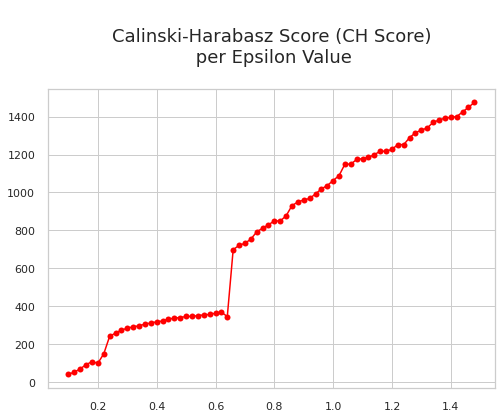

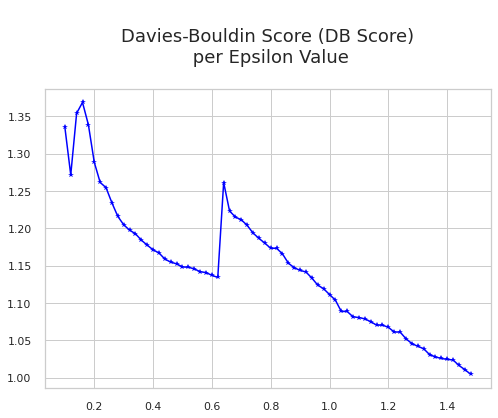

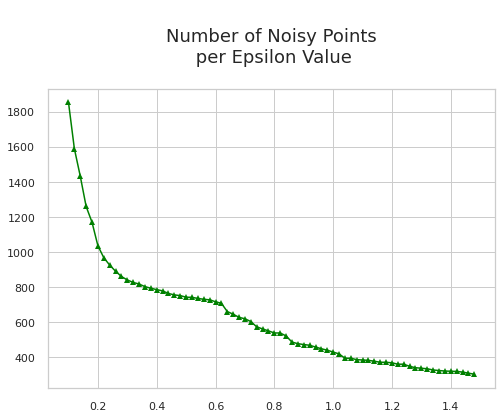

In [ ]:
x_eps=[]
ch =[]
db=[]
no=[]

for e in np.arange(0.1, 1.5, 0.02):
  dbscan1=  DBSCAN(eps=e, min_samples=51)
  ypred_db_s =dbscan1.fit_predict(pca_s_df)
  x_eps.append(e)
  ch.append(calinski_harabasz_score(pca_s_df, ypred_db_s))
  db.append(davies_bouldin_score(pca_s_df, ypred_db_s))
  no.append(np.sum(ypred_db_s==-1))
  # print(ch)
plt.plot(x_eps, ch, color = "red", marker = "o", label = "Array elements")
# plt.legend()
plt.title('\nCalinski-Harabasz Score (CH Score)\n per Epsilon Value\n', fontsize=18)
plt.show()
# plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/CH_Scores.png")

plt.plot(x_eps, db, color = "blue", marker = "*", label = "Array elements")
# plt.legend()
plt.title('\nDavies-Bouldin Score (DB Score)\n per Epsilon Value\n', fontsize=18)
plt.show()
# plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/DB_Scores.png")

plt.plot(x_eps, no, color = "green", marker = "^", label = "Array elements")
# plt.legend()
plt.title('\nNumber of Noisy Points\n per Epsilon Value\n', fontsize=18)
plt.show()
# plt.savefig("/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/NO_Points.png")

In [ ]:
dbs = DBSCAN(eps=0.625, min_samples=51)
ypredicts=dbs.fit_predict(pca_s_df)
# para=dbs.get_params()
print("")
print("No. of clusters: {}".format(np.unique(dbs.labels_).shape))
print("No. of noisy points: {}" .format(np.sum(ypredicts==-1)))
print("CH Score ={0:.6g}" .format(calinski_harabasz_score(pca_s_df, ypredicts)))
print("DB Score ={0:.4g}" .format(davies_bouldin_score(pca_s_df, ypredicts)))
# print(para)

from collections import Counter 
# To count the number of noisy points (labeled as -1; outliers); Collectly clustered (labeled 1); sparse (labeled 0)
# outlier_df =pd.DataFrame(data)
# print (Counter( model.labels_))
outlier_df =pd.DataFrame(pca_s_df)
print (Counter( dbs.labels_))
print(" ")
print (outlier_df[dbs.labels_ == -1])

# https://www.datasciencelearner.com/projection-detecting-outliers-dbscan-method/
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

# We now have identified outliers however, because we have already performed dimensionality reduction on our data using PCA, we have lost some information 


No. of clusters: (3,)
No. of noisy points: 668
CH Score =340.177
DB Score =1.264
Counter({0: 1539, -1: 668, 1: 38})
 
       pc1   pc2   pc3
1     0.27  1.55 -3.17
3    32.54 16.06  0.92
4    -0.17 -2.64 -2.45
9    29.73 10.61  1.09
11    3.37 -0.82 -2.36
...    ...   ...   ...
2227 -1.88 -0.61 -2.49
2228  1.77  0.47 -2.94
2237  1.76  1.64 -2.64
2240 -0.96 -0.17 -2.16
2242 -0.50 -1.27 -2.61

[668 rows x 3 columns]


### Trying to explain the features' importance emerging from Principal Component Analysis 

In [ ]:
# Xs_test

STABBR OBEREG HDEGOFFR HBCU LOCALE INSTCAT CNTLAFFI OPENADMP CREDITS1  \
31705     IL      3       40    2     11       1        1        1        1   
34360     IN      3       20    2     41       2        4        2        1   
34162     NJ      2       30    2     21       1        2        1        0   
34140     CA      8       30    2     12       2        2        2        0   
34133     FL      5       14    2     42       2        4        2        1   
...      ...    ...      ...  ...    ...     ...      ...      ...      ...   
32682     NY      2       20    2     11       2        4        2        1   
32526     NJ      2       11    2     21       2        4        2        1   
31945     KS      4       13    2     32       2        1        2        1   
32158     MA      1       40    2     21       1        1        1        1   
33906     FL      5       20    2     13       2        3        1        1   

      CREDITS2  ... ADMCON3 ADMCON4 ADMCON5 ADMCON6 ADMCON7 ADMCON8 ADMCON9  \
31705        1  ...       0       0       0       0       0       0       0   
34360        1  ...       1       3       1       3       2       1       3   
34162        0  ...       0       0       0       0       0       0       0   
34140        0  ...       1       3       5       1       3       1       3   
34133        0  ...       1       2       2       3       5       1       3   
...        ...  ...     ...     ...     ...     ...     ...     ...     ...   
32682        0  ...       1       2       1       3       2       2       3   
32526        1  ...       1       1       3       3       5       1       3   
31945        1  ...       1       2       3       3       5       1       3   
32158        1  ...       0       0       0       0       0       0       0   
33906        0  ...       0       0       0       0       0       0       0   

      SATNUM ACTNUM EFYTOTLT  
31705      0      0     3740  
34360      0      0      228  
34162      0      0      356  
34140      0      0      326  
34133    164    138     1137  
...      ...    ...      ...  
32682      0      0     3661  
32526    356     39     2380  
31945      0      0     5745  
32158      0      0     9466  
33906      0      0     1109  

[963 rows x 47 columns]

[ 8.12680221e-02 -4.90177371e-01  1.06404747e-02  5.89431127e-02
  9.79859004e-01  1.13467404e-03  2.16039412e-02  2.22044365e-02
  2.34189979e-02  1.11736821e-01  1.61658665e-02  1.06269060e-02
  1.20963962e-03  7.38816875e-04  4.87197691e-02  2.41325126e-02
  4.17484685e-03  8.83284039e-03  3.42676044e-03  4.33956766e-02
  1.07075919e-02  1.92180361e-02  1.95845033e-02  1.44147852e-02
  1.54714112e-02  1.61751769e-02  6.62770319e-03  2.51256047e-02
  2.51755132e-02  1.88583026e-02  7.79289253e-03  9.73286359e-03
  4.26177613e-02  6.77402518e-03  7.82413510e-03  6.12712900e-03
  2.47215473e-02  1.74858512e-02  4.53213293e-03  5.98456956e-02
  4.56589283e-02  1.42440905e-02  1.48186217e-02  2.09598746e-02
  8.96096255e-04  1.57482701e-02  4.04131293e-03  1.93375659e-02
  6.46090920e-02  1.15918537e-02  2.78001458e-02  1.35767342e-03
  2.66817616e-02  1.55373046e-02  1.10816662e-02  5.30057538e-03
  4.11069191e-02  1.23650751e-01  1.40425106e-01  9.07241655e-02
  2.75038250e-01  1.19758

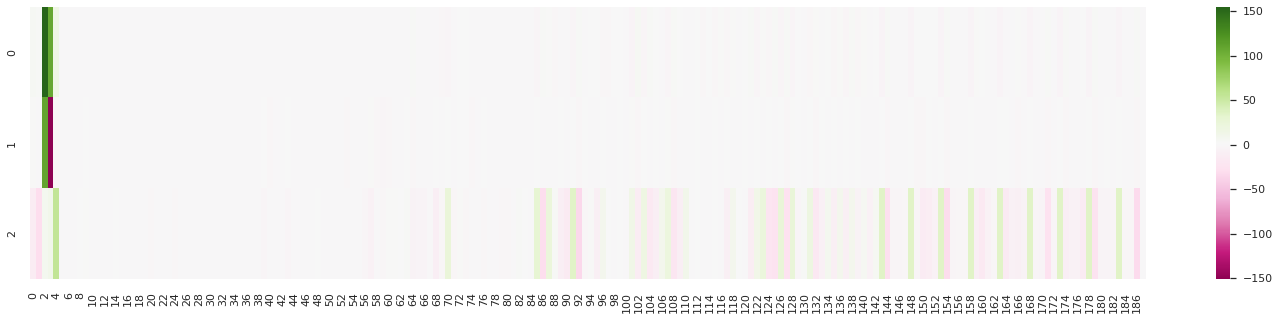

In [ ]:
# pca = sklearn.decomposition.PCA()
# pca.fit(X)

# nComp = 2
# Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
# Xhat += mu

# print(Xhat[0,])

# pca2_s = PCA(n_components=3)
# pca2_s.fit(Xs_train_scaled1)
# pca_scale_result_s = pca2_s.transform(Xs_train_scaled1)
# pca_s_df = pd.DataFrame(pca_scale_result_s, columns=['pc1', 'pc2', 'pc3'])
# print("Increase in Explained Variance with every additional principal component: ", pca2.explained_variance_ratio_)
# pca_s_df
mu = mean(Xs_train_scaled1)

nComp = 3
Xhat = np.dot(pca2_s.transform(Xs_train_scaled1)[:,:nComp], pca2_s.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])
# Xhat.size
# Xs_train_scaled1.size
# https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com
# https://towardsdatascience.com/unpacking-pca-b5ea8bec6aa5



plt.figure(figsize=(25, 5))

sns.heatmap(pca2_s.inverse_transform(Xs_train_scaled1.shape[1]), cmap="PiYG", cbar=True)

# http://jotterbach.github.io/content/posts/pca/2016-03-24-Principal_Component_Analysis/

In [ ]:
df_2020cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3208 entries, 31123 to 33789
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   STABBR       3208 non-null   object
 1   OBEREG       3208 non-null   object
 2   HDEGOFFR     3208 non-null   object
 3   HBCU         3208 non-null   object
 4   LOCALE       3208 non-null   object
 5   INSTCAT      3208 non-null   object
 6   INSTSIZE     3208 non-null   object
 7   CNTLAFFI     3208 non-null   object
 8   OPENADMP     3208 non-null   object
 9   CREDITS1     3208 non-null   object
 10  CREDITS2     3208 non-null   object
 11  CREDITS3     3208 non-null   object
 12  CREDITS4     3208 non-null   object
 13  SLO5         3208 non-null   object
 14  SLO6         3208 non-null   object
 15  SLO7         3208 non-null   object
 16  SLO83        3208 non-null   object
 17  STUSRV1      3208 non-null   object
 18  STUSRV2      3208 non-null   object
 19  STUSRV3      3208 non-

### Let us try to take care some of the autocorrelation existing between variables 

In [ ]:

# vals = df_2020cl['INSTSIZE'].values
# sizes =[]

# for  x in vals:
#   if x=='3':
#       # print(x)
#     sizes.append(7499.5)
#   elif x=='1':
#     sizes.append(500.5)
#   elif x=='2':
#     sizes.append(2999.5)
#   elif x=='4':
#     sizes.append(14999.5)
#   elif x=='5':
#     sizes.append(28398)
#   # print(sizes)
# df_2020cl['SIZES'] = sizes
# # df_2020cl.tail()
# print(sizes)
# type(sizes)

# enrols = df_2020cl['EFYTOTLT'].values
# # print(enrols.size)
# compares = (df_2020cl['SIZES'].values)
# # print(compares.size)
# # df['COMPARES'] = compares
# ratios = []

# for i in range (len(enrols)):
#   # print(i)
#   rat_[i] ==100*(enrols[i]/compares[i])
#   print(rat_[i])
#   ratios.append(rat_[i])
#   print(ratios)

# # df_2020cl['ENROL_RATIOS'] = ratios
# # df.tail()  

# # # df.drop(['EFYTOTLT','SIZES'], axis=1, inplace=True)
# # # df_2020cl.drop(['SIZES'], axis=1, inplace=True)

# # INSTSIZE	1	Under 1,000 = 501 USED: 500.5
# # INSTSIZE	2	1,000 - 4,999 = 3000 USED: 2999.5
# # INSTSIZE	3	5,000 - 9,999 = 7500 USED: 7499.5
# # INSTSIZE	4	10,000 - 19,999 = 15000 USED: 14999.5
# # INSTSIZE	5	20,000 and above USED:

In [ ]:


# # https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31
# # https://vitalflux.com/feature-extraction-pca-python-example/
# # https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a
# # https://medium.com/@mayureshrpalav/principal-component-analysis-feature-extraction-technique-3f480d7b9697
# # https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# # https://stackoverflow.com/questions/30223161/matplotlib-mplot3d-how-to-increase-the-size-of-an-axis-stretch-in-a-3d-plo


# numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
# numeric_transformer = RobustScaler()


# categorical_features = ['OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
#                         'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
#                         'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
#                         'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
# categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

# scaler = ColumnTransformer(
#     transformers=[
#                   ("num", numeric_transformer, numeric_features),
#                   ("cat", categorical_transformer, categorical_features)
#                   ]
#                   )

# scaler_y = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled1=pd.DataFrame(X_train_scaled)
# X_test_scaled1=pd.DataFrame(X_test_scaled)

# y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
# y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

# y_train_scaled1=pd.DataFrame(y_train_scaled)
# y_test_scaled1=pd.DataFrame(y_test_scaled)


# # Looking at a total of two  pricipal components 
# pca2 = PCA(n_components=2)
# # X_train_pca = pca2.fit(X_train_scaled1)
# # X_test_pca = pca2.fit(X_test_scaled1)
# pca2.fit(X_train_scaled1)
# pca_scale_result = pca2.transform(X_train_scaled1)
# pca_df = pd.DataFrame(pca_scale_result, columns=['pc1', 'pc2'])
# print(pca2.explained_variance_ratio_)
# pca_df



# fig= plt.figure(figsize=(12,12))
# # ax = fig.add_subplot(projection='2d')
# # ax = plt.axes(projection='3d')
# # Data for three-dimensional scattered points
# # zdata = pca_df['pc3']
# xdata = pca_df['pc1']
# ydata = pca_df['pc2']

# ### SCALING ONE LINER 
# # ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2,2, 2, 2]))


# # # # Change the viewing angle to an agreeable one
# # ax.view_init(2,None)
# sns.scatterplot(data=pca_df, x="pc1", y="pc2")

# # ax.scatter(xdata, ydata, cmap='viridis');

# # ax.contour3D(xdata, ydata, zdata, 50, cmap='binary')
# ax.set_xlabel('pc1')
# ax.set_ylabel('pc2')
# # ax.set_zlabel('pc3');

# # ax.plot(z, y, x, label='parametric curve')
# ax.legend()

# plt.show()


# g = sns.pairplot(pca_df, diag_kind="kde", corner=True)
# # g.map_lower(sns.kdeplot, levels=1, color=".2")

# # # Save image as a png file # # # 
# # plt.savefig("plot.png")

# db = DBSCAN(eps=9, min_samples=51).fit(pca_df)
# labels = db.labels_
# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)
# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_df, labels))


  




### Applying DBSCAN using a range of epsilon values then we can see what the best predicted number of clusters may be for varying epsilon values  

In [ ]:
# # https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31

# # eps_vals = range(1,25, 1)
# eps_vals = np.arange(0.1,10.5,0.2) 
# sil_score_per_k=[]
# for k in eps_vals:
#   db = DBSCAN(eps=k,min_samples=51).fit(pca_df)
#   labels = db.labels_
#   n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#   n_noise_ = list(labels).count(-1)
#   print('the epsilon value is : ', k)
#   print('Estimated number of clusters: %d' % n_clusters_)
#   print('Estimated number of noise points: %d' % n_noise_)
#   print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_df, labels))
#   sil = metrics.silhouette_score(pca_df, labels)
#   sil_score_per_k.append(sil)
# plt.plot(sil_score_per_k)
# plt.xlabel('Epsilon Values')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score per Epsilon Value ')
# plt.show()

### Based on the information above the best epsilon value appears to be 0.5

In [ ]:
# db = DBSCAN(eps=0.5, min_samples=51).fit(pca_df) # 0.0623
# labels = db.labels_
# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)
# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_df, labels))

In [ ]:
# from sklearn.model_selection import ParameterGrid
# >>> param_grid = {'a': [1, 2], 'b': [True, False]}
# ParameterGrid(param_grid)


In [ ]:
# # pca_eps_values = range(1,25, 1)
# pca_eps_values = np.arange(0.5,0.6,0.1) 

# pca_min_samples = range(51,1001, 1) #min_samples=51
# pca_dbscan_params = list(product(pca_eps_values, pca_min_samples))
# pca_no_of_clusters = []
# pca_sil_score = []
# pca_epsvalues = []
# pca_min_samp = []
# for p in pca_dbscan_params:
#     pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_df)
#     pca_epsvalues.append(p[0])
#     pca_min_samp.append(p[1])
#     pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
#     # pca_sil_score.append(silhouette_score(pca_df, pca_dbscan_cluster.labels_))
#   # sil = metrics.silhouette_score(pca_df, labels)
#   # sil_score_per_k.append(sil)
#   # silhouette_avg = silhouette_score(X, cluster_labels)
# pca_eps_min = list(zip(pca_no_of_clusters, pca_epsvalues, pca_min_samp))
# pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'epsilon_values', 'minimum_points'])    
# # pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
# # pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])
# pca_eps_min_df

In [ ]:
# # pca_eps_values = range(1,25, 1)
# pca_eps_values = np.arange(0.4,0.8,0.1) 
# # pca_eps_values=0.5

# pca_min_samples = range(51,101, 1) #min_samples=51
# pca_dbscan_params = list(product(pca_eps_values, pca_min_samples))
# # pca_dbscan_params = product(pca_eps_values, pca_min_samples)
# pca_no_of_clusters = []
# pca_sil_score = []
# pca_epsvalues = []
# pca_min_samp = []
# for p in pca_dbscan_params:
#     pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_df)
#     pca_epsvalues.append(p[0])
#     pca_min_samp.append(p[1])
#     pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
#     # pca_sil_score.append(silhouette_score(pca_df, pca_dbscan_cluster.labels_))
#   # sil = metrics.silhouette_score(pca_df, labels)
#   # sil_score_per_k.append(sil)
#   # silhouette_avg = silhouette_score(X, cluster_labels)
# pca_eps_min = list(zip(pca_no_of_clusters, pca_epsvalues, pca_min_samp))
# pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'epsilon_values', 'minimum_points'])    
# # pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
# # pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])
# pca_eps_min_df